In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import sklearn.linear_model as lm
from datetime import datetime
import seaborn as sns
import scipy.stats as ss
from arch import arch_model
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from arch.compat.numba import jit
from datetime import datetime
from enum import Enum
import math

import warnings
warnings.filterwarnings('ignore')

import numpy.random as npr
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from hmmlearn import hmm
from scipy.optimize import minimize

Metrics

In [298]:
def VaR(rets, alpha=0.05 ):
    var = np.quantile(rets, alpha)
    return abs(var)

def RachevRatio(rets, rf=0, alpha=0.05, beta=0.05):
    return -VaR(rf - rets, alpha)/VaR(rets - rf, beta)

Data preparation

In [3]:
l = ['MMM', 'ACE', 'ABT', 'ANF', 'ACN', 'ADBE', 'AMD', 'AES', 'AET', 'AFL', 'A', 'GAS', 'APD', 'ARG', 'AKAM', 'AA', 'ALXN', 'ATI', 'AGN', 'ALL', 'ANR', 'ALTR', 'MO', 'AMZN', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'APOL', 'AAPL', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVB', 'AVY', 'AVP', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BEAM', 'BDX', 'BBBY', 'BMS', 'BRK.B', 'BBY', 'BIG', 'BIIB', 'BLK', 'HRB', 'BMC', 'BA', 'BWA', 'BXP', 'BSX', 'BMY', 'BRCM', 'BF.B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM', 'CPB', 'COF', 'CAH', 'CFN', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLF', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'CBE', 'GLW', 'COST', 'CVH', 'COV', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DF', 'DE', 'DELL', 'DNR', 'XRAY', 'DVN', 'DV', 'DO', 'DTV', 'DFS', 'DISCA', 'DLTR', 'D', 'RRD', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQR', 'EL', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FDO', 'FAST', 'FII', 'FDX', 'FIS', 'FITB', 'FHN', 'FSLR', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FRX', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GCI', 'GPS', 'GD', 'GE', 'GIS', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOG', 'GWW', 'HAL', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS', 'HCP', 'HCN', 'HNZ', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 'HBAN', 'ITW', 'IR', 'TEG', 'INTC', 'ICE', 'IBM', 'IFF', 'IGT', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JBL', 'JEC', 'JDSU', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KFT', 'KR', 'LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LUK', 'LXK', 'LIFE', 'LLY', 'LTD', 'LNC', 'LLTC', 'LMT', 'L', 'LO', 'LOW', 'LSI', 'MTB', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHP', 'MCK', 'MJN', 'MWV', 'MDT', 'MRK', 'MET', 'PCS', 'MCHP', 'MU', 'MSFT', 'MOLX', 'TAP', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NBR', 'NDAQ', 'NOV', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NU', 'NRG', 'NUE', 'NVDA', 'NYX', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'BTU', 'JCP', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'QEP', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'RHT', 'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RDC', 'R', 'SWY', 'SAI', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SHLD', 'SRE', 'SHW', 'SIAL', 'SPG', 'SLM', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'S', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'SUN', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TE', 'THC', 'TDC', 'TER', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TWC', 'TIE', 'TJX', 'TMK', 'TSS', 'TRIP', 'TSN', 'TYC', 'USB', 'UNP', 'UNH', 'UPS', 'X', 'UTX', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WAG', 'DIS', 'WPO', 'WM', 'WAT', 'WPI', 'WLP', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WIN', 'WEC', 'WPX', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZMH', 'ZION']

In [4]:
#sp500list = pd.read_csv('SP500list.csv')
#l = sp500list.Symbol.values
#print(list(l))

In [5]:
q = ""
for t in l[:250]:
    q = q + t + " "
q = q[:-1]
data = yf.download(q, start="2010-01-01", end="2010-01-05")
d = data['Adj Close'].isna().sum()
rm1 = list(d[d == 1].index)

[*********************100%%**********************]  250 of 250 completed


67 Failed downloads:
['BRCM', 'CSC', 'HSP', 'BCR', 'BF.B', 'APOL', 'DPS', 'HCN', 'HCBK', 'CFN', 'BMC', 'FDO', 'CAM', 'CVC', 'CBG', 'COV', 'CCE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2010-01-05)')
['HRS', 'BBT', 'ESV', 'CELG', 'FLIR', 'BBBY', 'ABC', 'CTL', 'FTR', 'JEC', 'DTV', 'FII', 'CERN', 'DF', 'COG', 'CBS', 'APC', 'CTXS', 'ETFC', 'RRD', 'DISCA', 'BLL', 'BRK.B', 'FISV', 'FRX', 'ALXN', 'DNR', 'AGN', 'AVP']: Exception('%ticker%: No timezone found, symbol may be delisted')
['ARG', 'HAR', 'DELL', 'DV', 'GAS', 'TEG', 'HCP', 'CVH', 'IR', 'DNB', 'CHK', 'ANR', 'DO', 'ACE', 'DOW', 'GCI', 'ALTR', 'BHI', 'COH', 'BEAM', 'EMC']: Exception("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1262667600")


In [6]:
q = ""
for t in l[250:]:
    q = q + t + " "
q = q[:-1]
data = yf.download(q, start="2010-01-01", end="2010-01-05")
d = data['Adj Close'].isna().sum()
rm2 = list(d[d == 1].index)

[*********************100%%**********************]  250 of 250 completed


79 Failed downloads:
['LXK', 'JOY', 'TWC', 'SNDK', 'TSO', 'COL', 'MJN', 'WFM', 'TYC', 'WAG', 'KFT', 'WYN', 'RAI', 'LO', 'PCS', 'STJ', 'TE', 'LTD', 'ZMH', 'PCLN', 'PCL', 'MWV', 'LUK', 'WLP', 'WPO', 'SIAL', 'SPLS', 'LLTC', 'SWY', 'JDSU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2010-01-05)')
['KMI', 'TRIP', 'MHP', 'SHLD', 'BTU', 'MPC', 'PX', 'SCG', 'HOT', 'PCP', 'S', 'SAI', 'PSX', 'NWSA', 'SUN', 'NU', 'LIFE', 'PLL', 'SE', 'NE', 'POM', 'XYL']: Exception("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1262667600")
['UTX', 'RTN', 'LLL', 'MON', 'RDC', 'PBCT', 'JCP', 'TIF', 'PKI', 'MYL', 'VIAB', 'LSI', 'LM', 'XL', 'XLNX', 'STI', 'WPX', 'YHOO', 'TMK', 'QEP', 'NYX', 'RHT', 'NBL', 'TSS', 'VAR', 'WIN', 'SYMC']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [7]:
rm = rm1 + rm2
tickers = set(l) - set(rm)
print('Were dropped', len(rm), 'tickers out of', len(l))

Were dropped 146 tickers out of 500


In [8]:
q = ""
for t in tickers:
    q = q + t + " "
q = q[:-1]
data = yf.download(q, start="2010-01-01", end="2023-01-01")

[*********************100%%**********************]  354 of 354 completed


In [9]:
prices = data['Adj Close']
d = prices.isna().sum()
rm = list(d[d > 0].index)
prices = prices.drop(columns=rm)
print(len(rm), 'more tickers were dropped')

12 more tickers were dropped


Buy and hold SP500

In [145]:
sp500data = yf.download('^GSPC', start="2010-01-01", end="2023-01-01")
SP500 = sp500data.loc[:, ['Adj Close']]
SP500.columns = ['Price']
w_hold = 100*SP500.values[100:]/SP500.values[100]
w_hold = w_hold.reshape(1, -1)[0]

[*********************100%%**********************]  1 of 1 completed


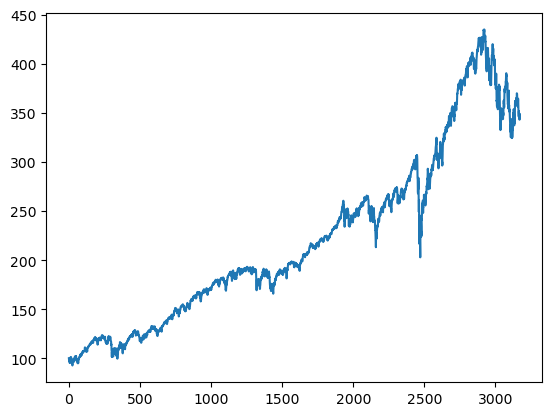

In [146]:
plt.plot(w_hold)
plt.show()

Volatility of SP500 by GJR-Garch(1, 1)

In [252]:
def L_GJR(params):
    prc = np.log(SP500.Price).diff().values
    mn, om, a, b, c = params
    v = 0
    s2 = [om/(1-a-b)]
    prc[0] = om/(1-a-b)
    for i in range(1, 2100):
        if (prc[i-1] - mn > 0):
            ind = 1
        else:
            ind = 0
        s2.append(om + a*((prc[i-1]-mn)**2) + b*(s2[len(s2)-1]) + c*ind*((prc[i-1]-mn)**2))
        v = v + 0.5* np.log(s2[len(s2)-1]) + ((prc[i]-mn)**2)/(2*s2[len(s2)-1])
    return v/2100

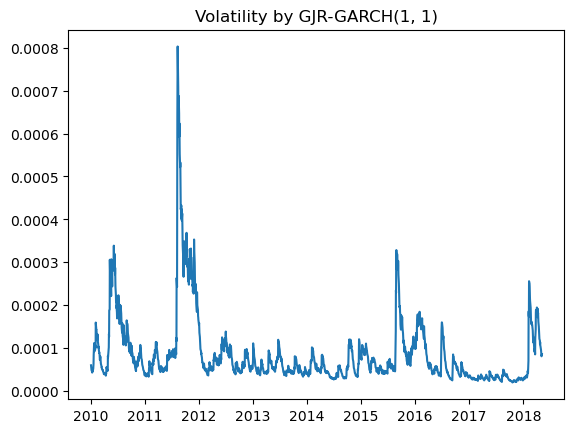

In [253]:
result = minimize(fun=L_GJR, x0=np.array([0.0003, 0.0001, 0.05, 0.9, 0.01]),
                  bounds=((-0.5, 0.5), (0, 1), (0.000001, 1), (0.000001, 1), (0.000001, 1)))
res = result.x
prc = np.log(SP500.Price).diff().values
mn, om, a, b, c = res
s2 = [om/(1-a-b)]
prc[0] = om/(1-a-b)
for i in range(1, 2100):
    if (prc[i-1] - mn > 0):
        ind = 1
    else:
        ind = 0
    s2.append(om + a*((prc[i-1]-mn)**2) + b*(s2[len(s2)-1]) + c*ind*((prc[i-1]-mn)**2))
    
plt.plot(SP500.Price.index[:2100], s2)
plt.title('Volatility by GJR-GARCH(1, 1)')
plt.show()

Dynamic Pair Trading

In [10]:
def top25corr(time, window, prices):
    returns = np.log(prices).diff().fillna(0)
    M = returns[returns.index[time-window]:returns.index[time]].corr().replace(to_replace=1, value=0)
    t1, t2 = list(M.max().sort_values(ascending=False).head(2).index)
    print(t1, t2, M.loc[t1, t2])
    for j in range(24):
        M = M.drop(columns=[t1, t2],index=[t1, t2])
        t1, t2 = list(M.max().sort_values(ascending=False).head(2).index)
        print(t1, t2, M.loc[t1, t2])

In [11]:
def chck(t1, t2, time, window, delay, returns, alph):
    reg = lm.LinearRegression()
    r1 = returns.loc[returns.index[time-window-delay]:returns.index[time-delay], t1].values.reshape(-1,1)
    r2 = returns.loc[returns.index[time-window-delay]:returns.index[time-delay], t2].values.reshape(-1,1)
    reg.fit(r1, r2)
    z = r2 - reg.predict(r1)
    k = reg.coef_[0, 0]
    t = returns.loc[returns.index[time], t2] - k*returns.loc[returns.index[time], t1]
    s1 = 0
    s2 = 0
    if (t >= np.percentile(z, 100 - alph)):
        s1 = k
        s2 = -1
    if (t <= np.percentile(z, alph)):
        s1 = -k
        s2 = 1
    #plt.plot(z) #for plotting
    #plt.plot([np.percentile(z, 100-alph)]*len(z))
    #plt.plot([np.percentile(z, alph)]*len(z))
    return s1, s2

In [12]:
def trading(start, window, delay, alph, npairs, mincorr, prices):
    returns = np.log(prices).diff().fillna(0)
    pctcomm = 0.02/100
    w = np.zeros(len(prices) - start)
    w[0] = 100
    pairs = []
    for i in range(len(prices))[start+1:]:
        w[i-start] = w[i-start-1]
        M = returns[returns.index[i-window-delay]:returns.index[i-delay]].corr().replace(to_replace=1, value=0)
        used_tickers = []
        for p in pairs:
            used_tickers = used_tickers + p[0]
                
        cap = npairs - len(pairs)
        new_pairs = []
        if (cap > 0):  # trying to fill capacity with new positions
            M1 = M.drop(columns=used_tickers, index=used_tickers)
            t1, t2 = list(M1.max().sort_values(ascending=False).head(2).index)
            if (M1.loc[t1, t2] >= mincorr):
                s1, s2 = chck(t1, t2, i, window, delay, returns, alph)
                if (s1 != 0):
                    pos1 = s1*(w[i-start-1]/npairs)/prices.loc[prices.index[i], t1]
                    pos2 = s2*(w[i-start-1]/npairs)/prices.loc[prices.index[i], t2]
                    comm = pctcomm*(abs(pos1)*prices.loc[prices.index[i], t1] + abs(pos2)*prices.loc[prices.index[i], t2])
                    w[i-start] = w[i-start] - comm
                    new_pairs.append([[t1, t2], [pos1, pos2]])
                for j in range(cap-1):
                    M1 = M1.drop(columns=[t1, t2],index=[t1, t2])
                    t1, t2 = list(M1.max().sort_values(ascending=False).head(2).index)
                    if (M1.loc[t1, t2] >= mincorr):
                        s1, s2 = chck(t1, t2, i, window, delay, returns, alph)
                        if (s1 != 0):
                            pos1 = s1*(w[i-start-1]/npairs)/prices.loc[prices.index[i], t1]
                            pos2 = s2*(w[i-start-1]/npairs)/prices.loc[prices.index[i], t2]
                            comm = pctcomm*(abs(pos1)*prices.loc[prices.index[i], t1] + abs(pos2)*prices.loc[prices.index[i], t2])
                            w[i-start] = w[i-start] - comm
                            new_pairs.append([[t1, t2], [pos1, pos2]])
                    
        for p in pairs: # managing old positions
            t1, t2 = p[0]
            pos1, pos2 = p[1]
            s1, s2 = chck(t1, t2, i, window, delay, returns, alph)
            if(s1*pos1 <= 0): # close position
                inc1 = pos1*(prices.loc[prices.index[i], t1] - prices.loc[prices.index[i-1], t1])
                inc2 = pos2*(prices.loc[prices.index[i], t2] - prices.loc[prices.index[i-1], t2])
                comm = pctcomm*(abs(pos1)*prices.loc[prices.index[i], t1] + abs(pos2)*prices.loc[prices.index[i], t2])
                w[i-start] = w[i-start] + inc1 + inc2 - comm
                pairs.remove(p)
            else: # keep position
                inc1 = pos1*(prices.loc[prices.index[i], t1] - prices.loc[prices.index[i-1], t1])
                inc2 = pos2*(prices.loc[prices.index[i], t2] - prices.loc[prices.index[i-1], t2])
                w[i-start] = w[i-start] + inc1 + inc2
        pairs = pairs + new_pairs
    return w

In [61]:
len(prices)
# train from 100 to 2100
# other - test

3272

Comparison of returns from dynamic pair trading with volatility

In [26]:
start = 100
ws = []
for wnd in [10, 20, 50, 100]:
    for npr in [1, 2, 3, 4, 5]:
        w = trading(start=start, window=wnd, delay=2, alph=2, npairs=npr, mincorr = 0.94, prices=prices)
        ws.append((wnd, npr, w))
        print('window', wnd, 'npairs', npr, 'return', w[1999] - 100)

window 10 npairs 1 return -22.172776345687467
window 10 npairs 2 return -25.201476448498937
window 10 npairs 3 return 7.7522241587204235
window 10 npairs 4 return 4.110178891565866
window 10 npairs 5 return 0.8610420011883804
window 20 npairs 1 return 5.974155776820581
window 20 npairs 2 return 13.393756239148686
window 20 npairs 3 return 21.550957937144332
window 20 npairs 4 return 6.256286626964126
window 20 npairs 5 return -2.7804411730278247
window 50 npairs 1 return 6.923648945688484
window 50 npairs 2 return 13.52341877513301
window 50 npairs 3 return 7.497931037213704
window 50 npairs 4 return 6.337924405379127
window 50 npairs 5 return 2.504613300132931
window 100 npairs 1 return -2.808685285212249
window 100 npairs 2 return -1.7951506766803078
window 100 npairs 3 return -0.840200594989966
window 100 npairs 4 return -2.0664407917518446
window 100 npairs 5 return -1.5151945741717725


10 1 -22.907833603569003
10 2 -25.566331932057437
10 3 7.3912298374563505
10 4 4.284845112670112
10 5 1.1908795528775897
20 1 5.933500649851936
20 2 12.75815865558026
20 3 21.09592281878747
20 4 5.958055679571075
20 5 -3.0068748858463863
50 1 6.923648945688484
50 2 13.52341877513301
50 3 7.497931037213704
50 4 6.337924405379127
50 5 2.504613300132931
100 1 -2.808685285212249
100 2 -1.7951506766803078
100 3 -0.840200594989966
100 4 -2.0664407917518446
100 5 -1.5151945741717725


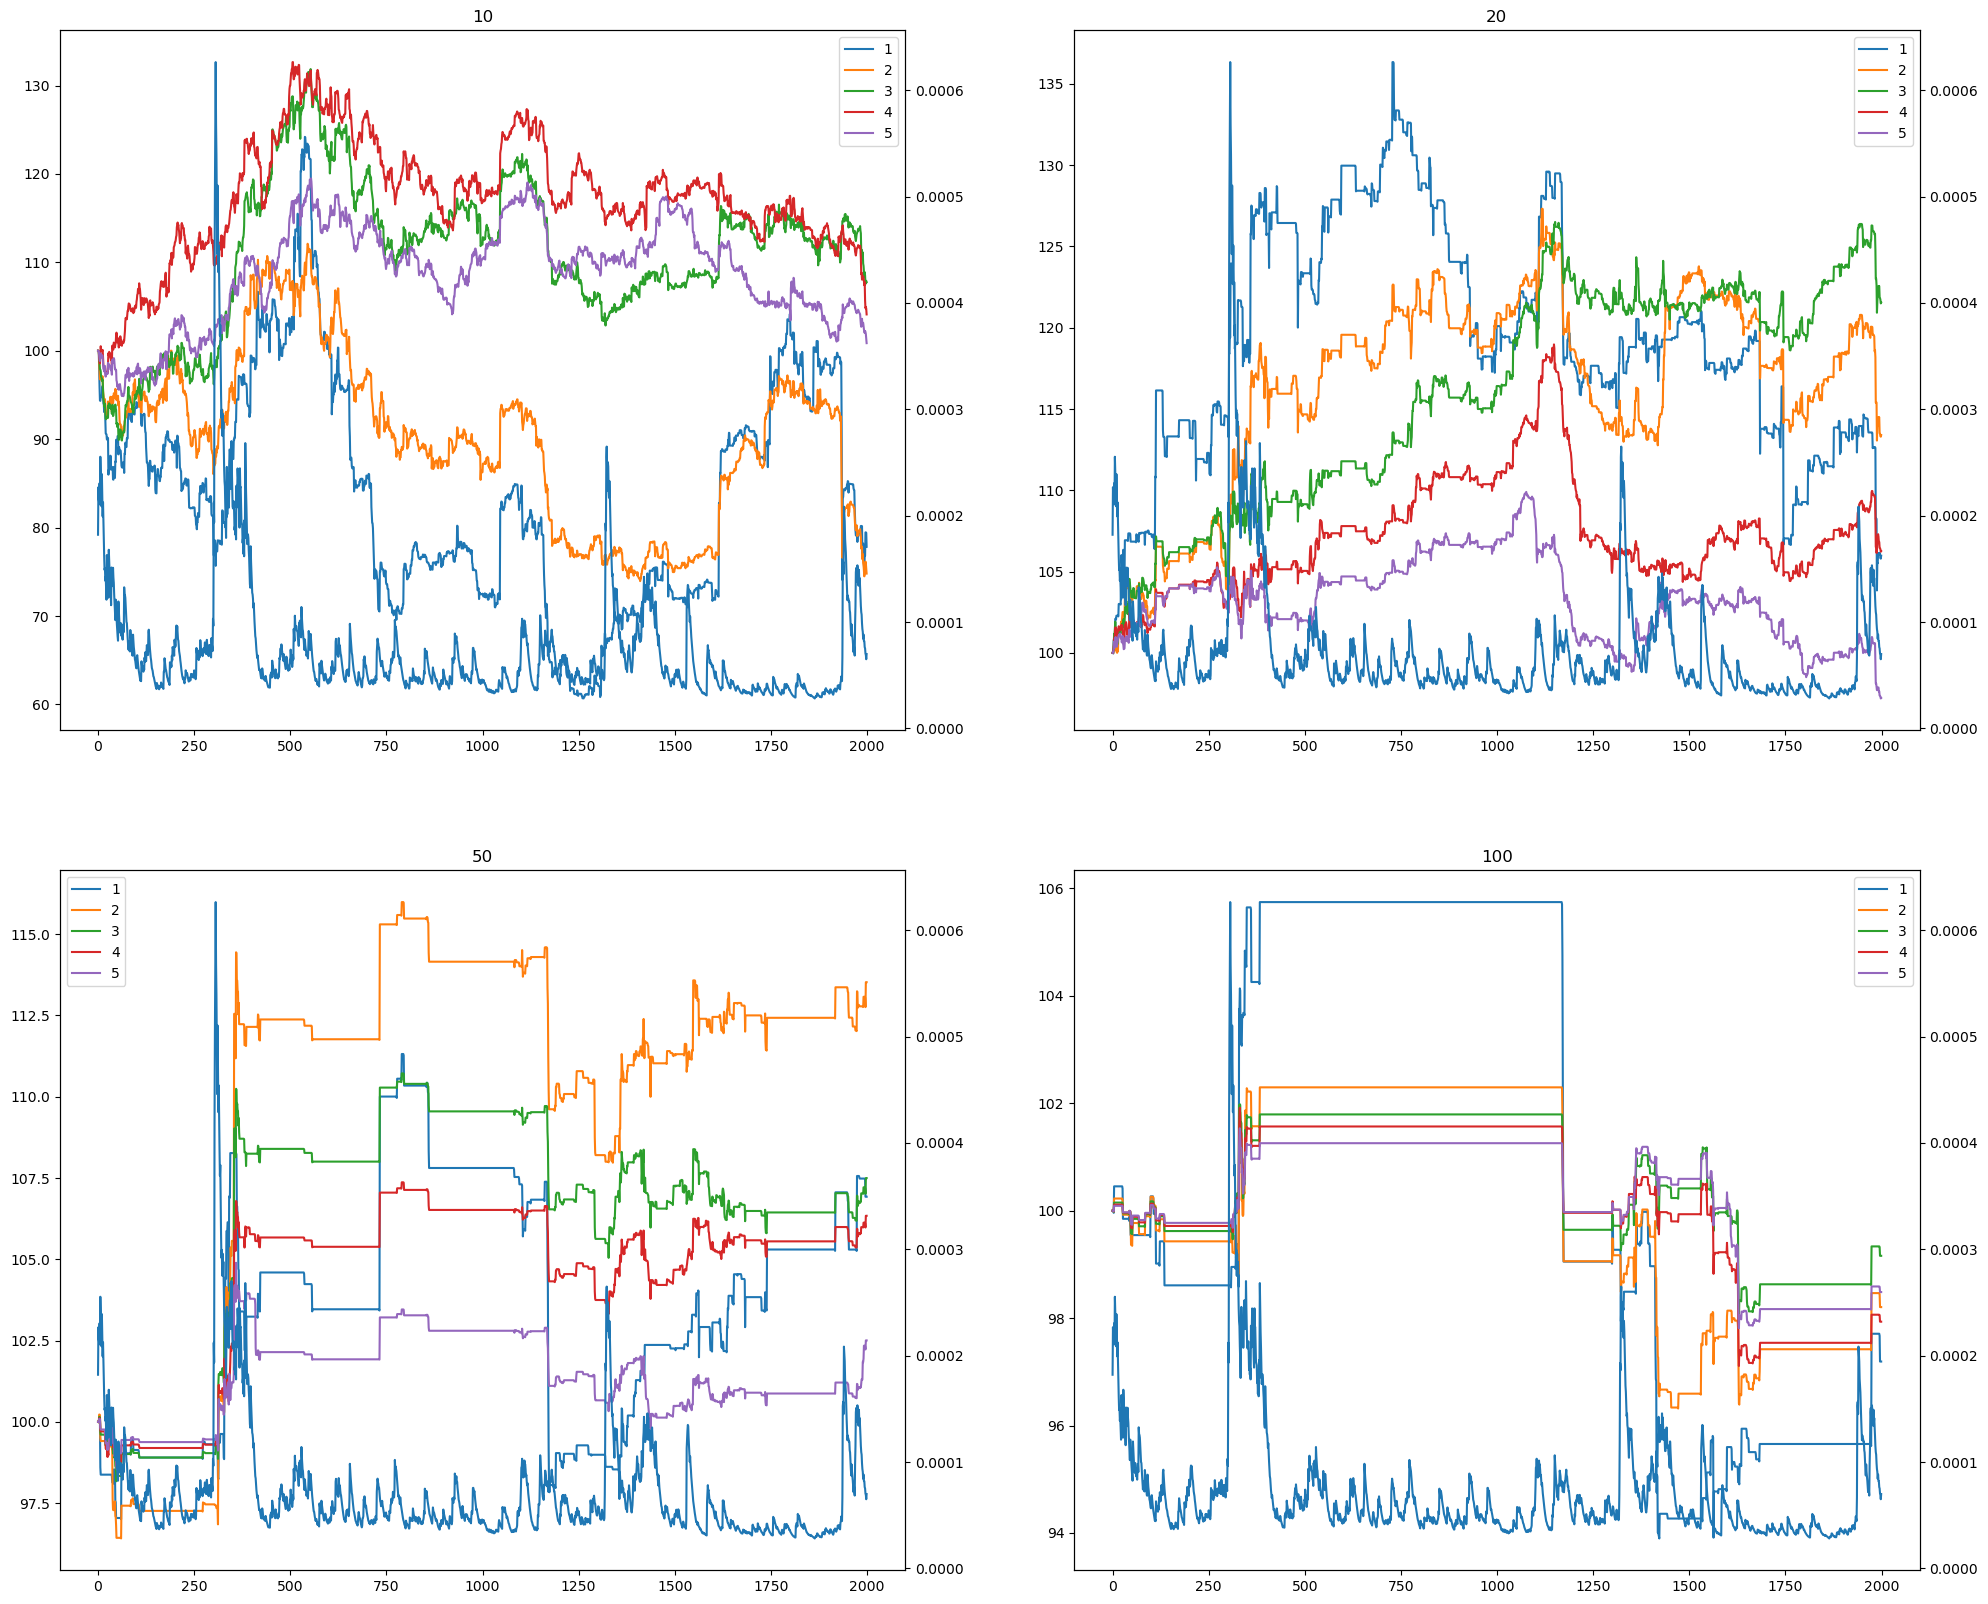

In [63]:
fig, axs = plt.subplots(figsize=(24, 20), ncols=2, nrows=2)
ar = [[10, 20], [50, 100]]
for i in range(2):
    for j in range(2):
        for w in ws:
            if (w[0] == ar[i][j]):
                axs[i][j].plot(w[2][:2000], label=str(w[1]))
                print(w[0], w[1], w[2][2000]-100)
            
        hlpax = axs[i][j].twinx()
        hlpax.plot(s2[100:], label='volatility')
        axs[i][j].legend()
        axs[i][j].set_title(str(ar[i][j]))
            
plt.show()

50 2 13.52341877513301


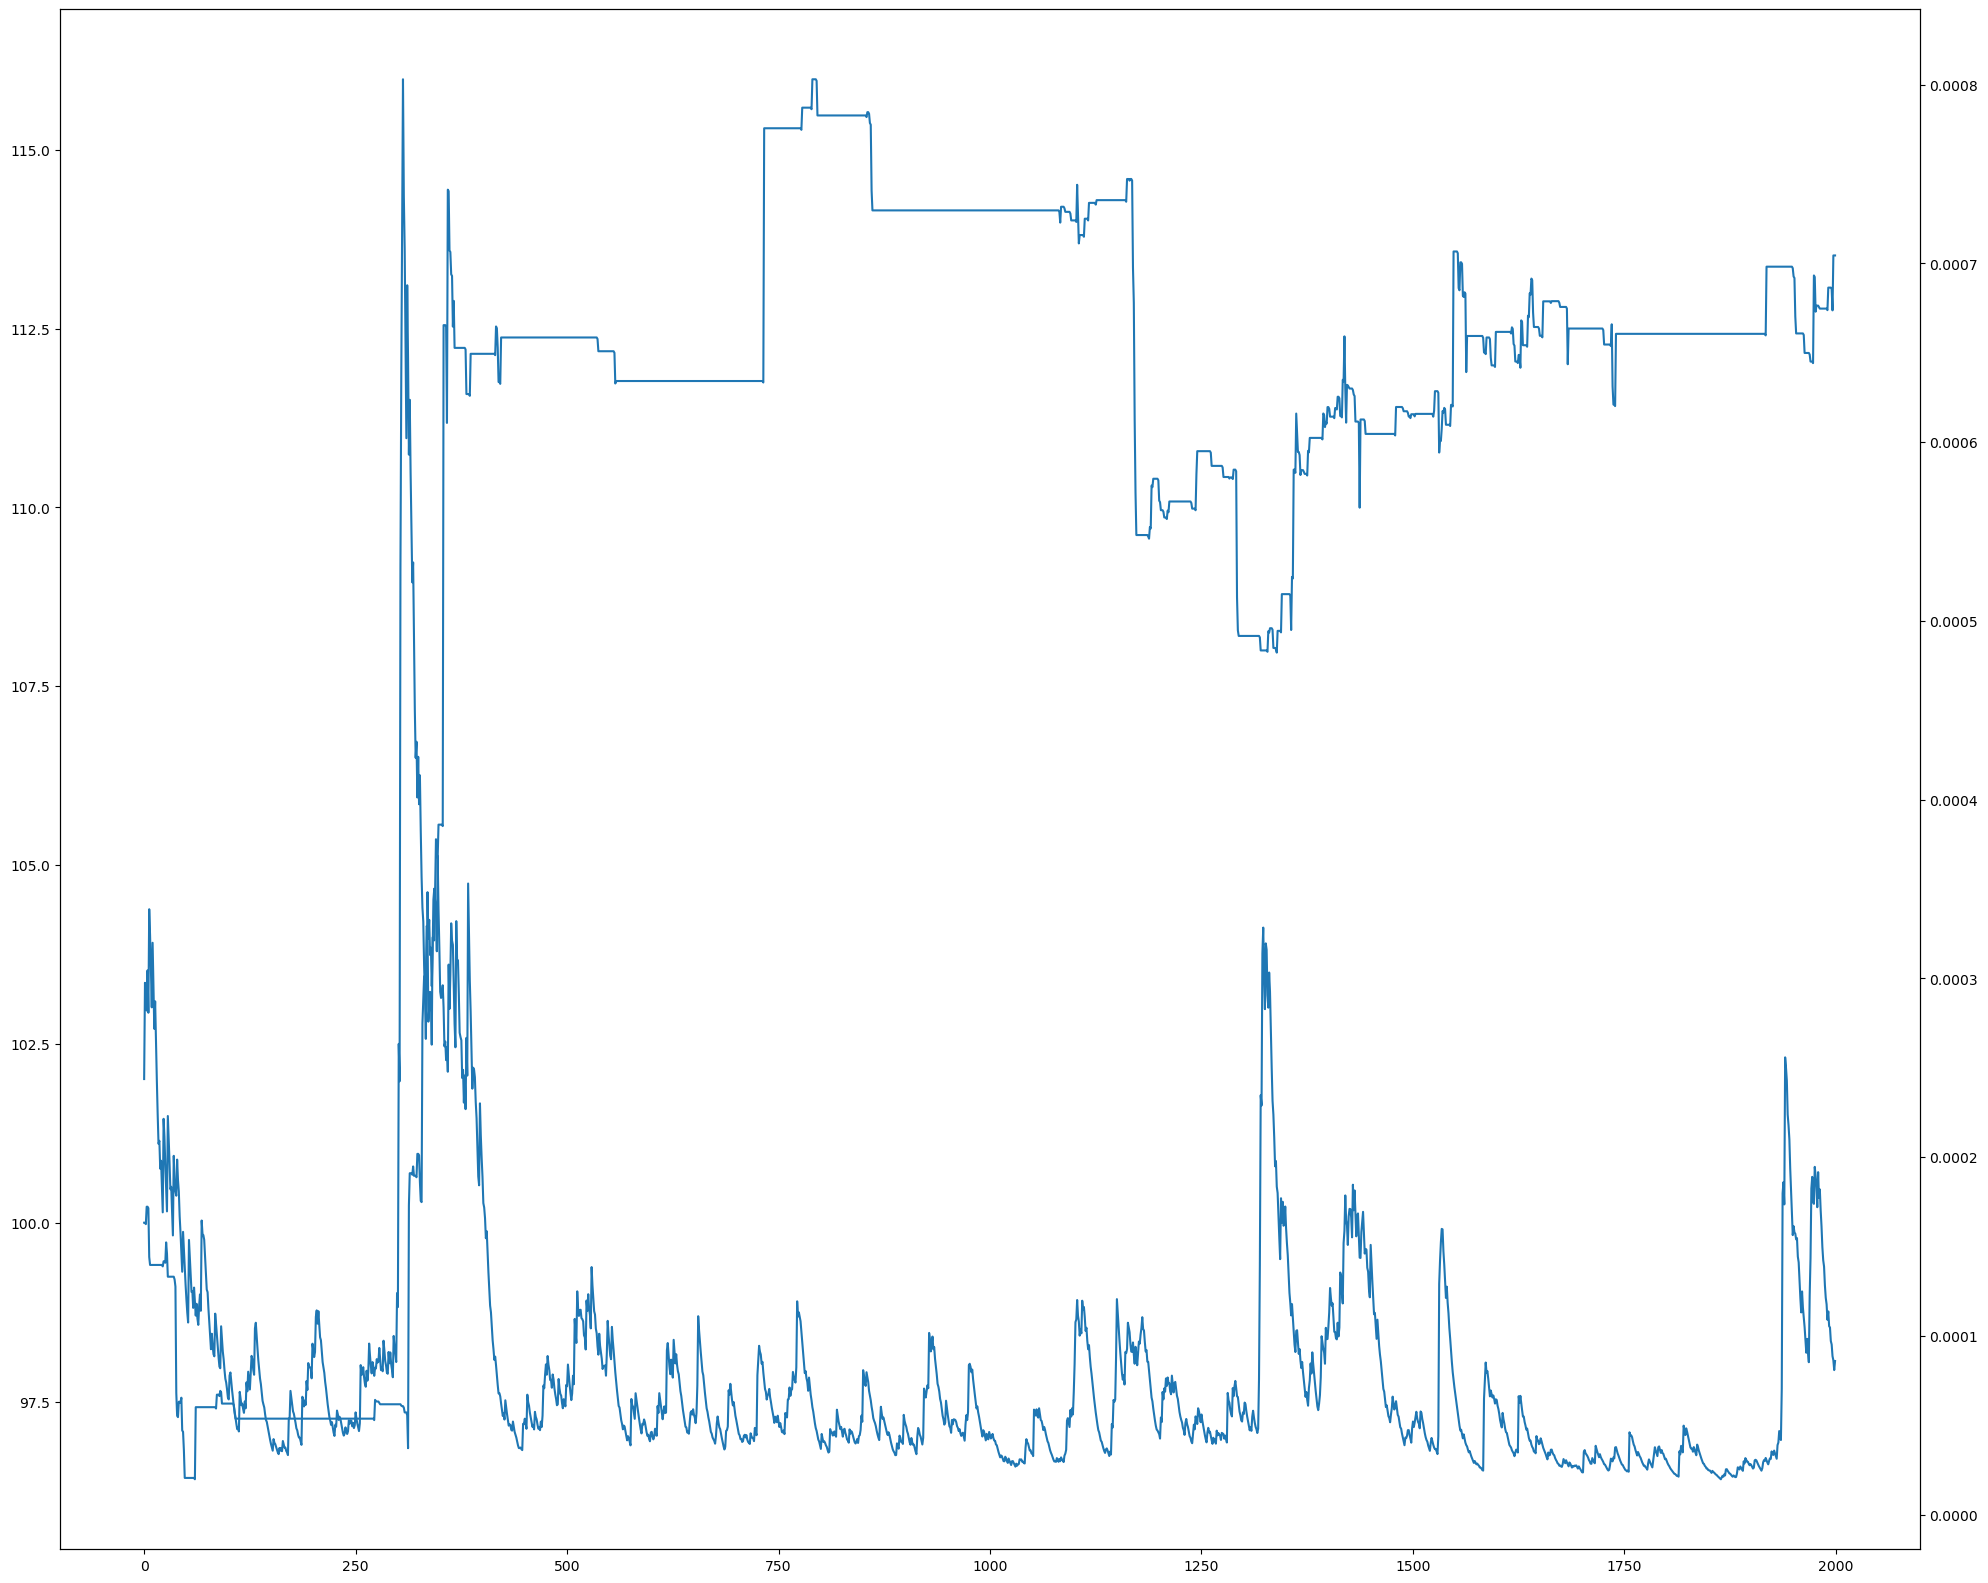

In [283]:
fig, axs = plt.subplots(figsize=(24, 20))
for w in ws:
    if (w[0] == 50):
        if (w[1] == 2):
            axs.plot(w[2][:2000])
            print(w[0], w[1], w[2][2000]-100)
            
hlpax = axs.twinx()
hlpax.plot(s2[100:2100], label='volatility')           
plt.show()

In [284]:
# Outcomes:
# delay 2 > delay 1, 3, 5
# window 10, 20 (seems we need to switch regimes)> window 30, 40, 60
# alph 2 > alph 1, 5, 10, 15, 20
# npairs 3, 5 > npairs 1, 2, 4, 6, 7, 10
# mincorr 0.9, 0.91, 0.925, 0.94 > mincorr 0.95, 0.975

Static pair trading

In [295]:
print('top correlated pairs from time = 2010-01-01 to time =', prices.index[2263].date())
top25corr(2263, 2263, prices)

top correlated pairs from time = 2010-01-01 to time = 2018-12-31
EQR AVB 0.8929578250409203
WEC XEL 0.8800234088125064
MET PRU 0.8768296172589758
VNO BXP 0.8685676728270814
CMS DTE 0.861083128522502
DHI LEN 0.8380833836836971
C BAC 0.8323491775304924
WFC USB 0.8313001048759435
KEY FITB 0.8280446580244113
GS MS 0.8248847448713975
AEP DUK 0.8238737530944817
NTRS BK 0.819874984464442
PFG LNC 0.8180585468797057
ED SO 0.8174708721566515
SPG KIM 0.8132852975378102
XOM CVX 0.805574924623447
AEE PNW 0.8026132809904252
IVZ BEN 0.8024923759296786
ZION CMA 0.800782357983316
V MA 0.8002503774036044
CB TRV 0.7947266427940051
NBR HP 0.7945340579984524
TXN ADI 0.7911751966199753
SLB HAL 0.7904103971242756
NSC CSX 0.7888123604909247


In [296]:
def stat_trading(start, window, delay, alph, prices):
    returns = np.log(prices).diff().fillna(0)
    pctcomm = 0.02/100
    w = np.zeros(len(prices) - start)
    w[0] = 100
    npairs = 1
    pairs = []
    for i in range(len(prices))[start+1:]:
        w[i-start] = w[i-start-1]
        used_tickers = []
        for p in pairs:
            used_tickers = used_tickers + p[0]
                
        cap = npairs - len(pairs)
        new_pairs = []
        if (cap > 0):  # trying to fill capacity with new positions
            t1 = 'EQR'
            t2 = 'AVB'
            s1, s2 = chck(t1, t2, i, window, delay, returns, alph)
            if (s1 != 0):
                pos1 = s1*(w[i-start-1]/npairs)/prices.loc[prices.index[i], t1]
                pos2 = s2*(w[i-start-1]/npairs)/prices.loc[prices.index[i], t2]
                comm = pctcomm*(abs(pos1)*prices.loc[prices.index[i], t1] + abs(pos2)*prices.loc[prices.index[i], t2])
                w[i-start] = w[i-start] - comm
                new_pairs.append([[t1, t2], [pos1, pos2]])
                    
        for p in pairs: # managing old positions
            t1, t2 = p[0]
            pos1, pos2 = p[1]
            s1, s2 = chck(t1, t2, i, window, delay, returns, alph)
            if(s1*pos1 <= 0): # close position
                inc1 = pos1*(prices.loc[prices.index[i], t1] - prices.loc[prices.index[i-1], t1])
                inc2 = pos2*(prices.loc[prices.index[i], t2] - prices.loc[prices.index[i-1], t2])
                comm = pctcomm*(abs(pos1)*prices.loc[prices.index[i], t1] + abs(pos2)*prices.loc[prices.index[i], t2])
                w[i-start] = w[i-start] + inc1 + inc2 - comm
                pairs.remove(p)
            else: # keep position
                inc1 = pos1*(prices.loc[prices.index[i], t1] - prices.loc[prices.index[i-1], t1])
                inc2 = pos2*(prices.loc[prices.index[i], t2] - prices.loc[prices.index[i-1], t2])
                w[i-start] = w[i-start] + inc1 + inc2
        pairs = pairs + new_pairs
    return w

-8.738814867751287


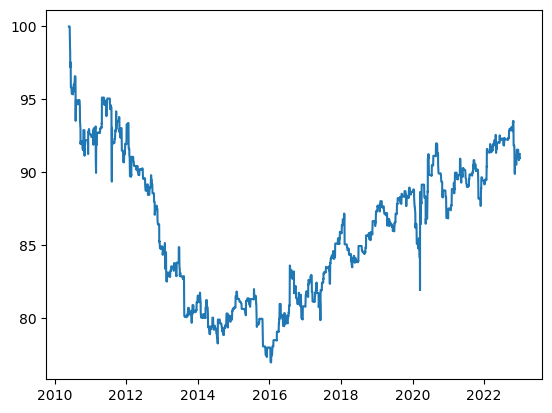

In [297]:
start = 100
w = stat_trading(start=start, window=10, delay=2, alph=2, prices=prices)
print(w[len(w)-1] - 100)
plt.plot(prices.index[start:], w)
plt.show()

In [299]:
w_ret = w[1:] / w[:len(w)-1] - 1
print('Var:', VaR(w_ret, alpha=0.05))
print('RachevRatio:', RachevRatio(w_ret, rf=0, alpha=0.05, beta=0.05))

Var: 0.0034959382100374636
RachevRatio: -0.9996342174928402


Moving Average Crossover

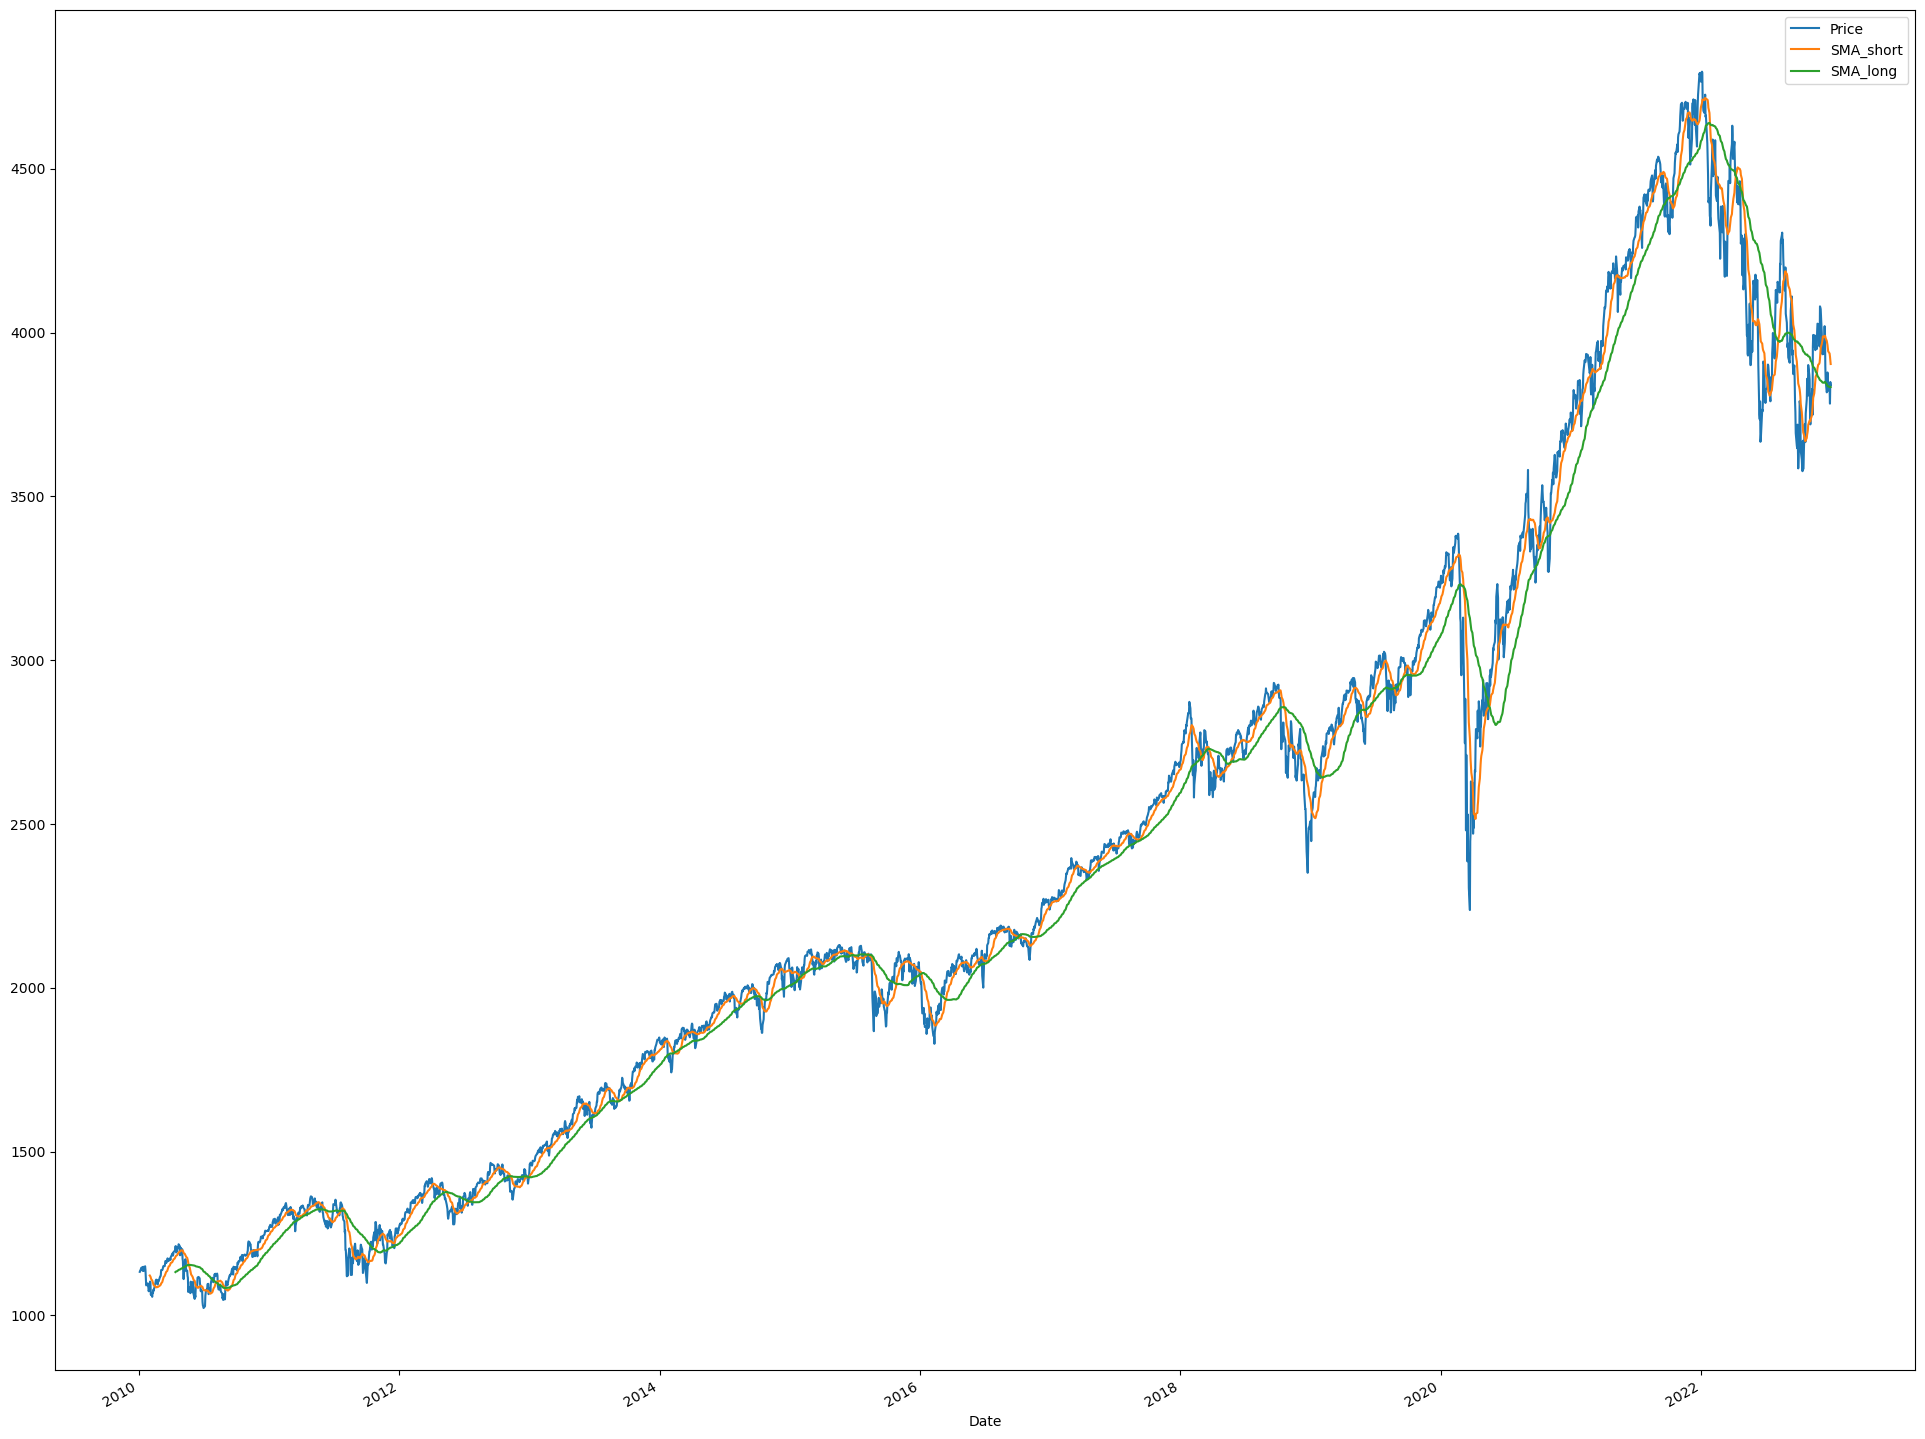

In [106]:
SP500['SMA_short'] = SP500.Price.rolling(window=20).mean()
SP500['SMA_long'] = SP500.Price.rolling(window=70).mean()
SP500.plot(figsize=(24, 20))
plt.show()

In [123]:
def Sig_to_Trade(data):
    sig_to_buy = []
    sig_to_sell = []
    flag = 0
    
    data['SMA_short'] = data.Price.rolling(window=20).mean()
    data['SMA_long'] = data.Price.rolling(window=70).mean()
    data['Price_change'] = data.Price.pct_change()
    for i in range(100, len(data)):
        if (data.SMA_short[data.index[i]] > data.SMA_long[data.index[i]]):
            if flag == 0:
                sig_to_buy.append(data.Price_change[data.index[i]])
                sig_to_sell.append(np.nan)
                flag = 1
            else:
                sig_to_buy.append(np.nan)
                sig_to_sell.append(np.nan)
        elif (data.SMA_short[SP500.index[i]] < data.SMA_long[data.index[i]]):
            if flag == 1:
                sig_to_buy.append(np.nan)
                sig_to_sell.append(data.Price_change[data.index[i]])
                flag = 0
            else:
                sig_to_buy.append(np.nan)
                sig_to_sell.append(np.nan)
        else:
            sig_to_buy.append(np.nan)
            sig_to_sell.append(np.nan)
            
    data['Buy'] = 100*[np.nan] + sig_to_buy
    data['Sell'] = 100*[np.nan] + sig_to_sell
    return data

In [125]:
def portfolio_cost(data):
    pctcomm = 0.02/100
    price = data.Price.values
    buy = data.Buy.fillna(0).values
    sell = data.Sell.fillna(0).values
    w = np.zeros(len(data))
    w[0] = 100
    k = 0

    for i in range(1, len(data)):
        w[i] = w[i-1] + k*(price[i]-price[i-1])  # reestimate our capital after the change of asset price

        if((buy[i] != 0) and (k == 0)): # buy if necessary
            k = w[i]/price[i]
            w[i] = w[i] - pctcomm*k*price[i]

        if ((sell[i] != 0) and (k != 0)): # sell if necessary
            k = 0
            w[i] = w[i] - pctcomm*k*price[i]

    return w

In [131]:
SP500 = Sig_to_Trade(SP500)
w_SMA = portfolio_cost(SP500)

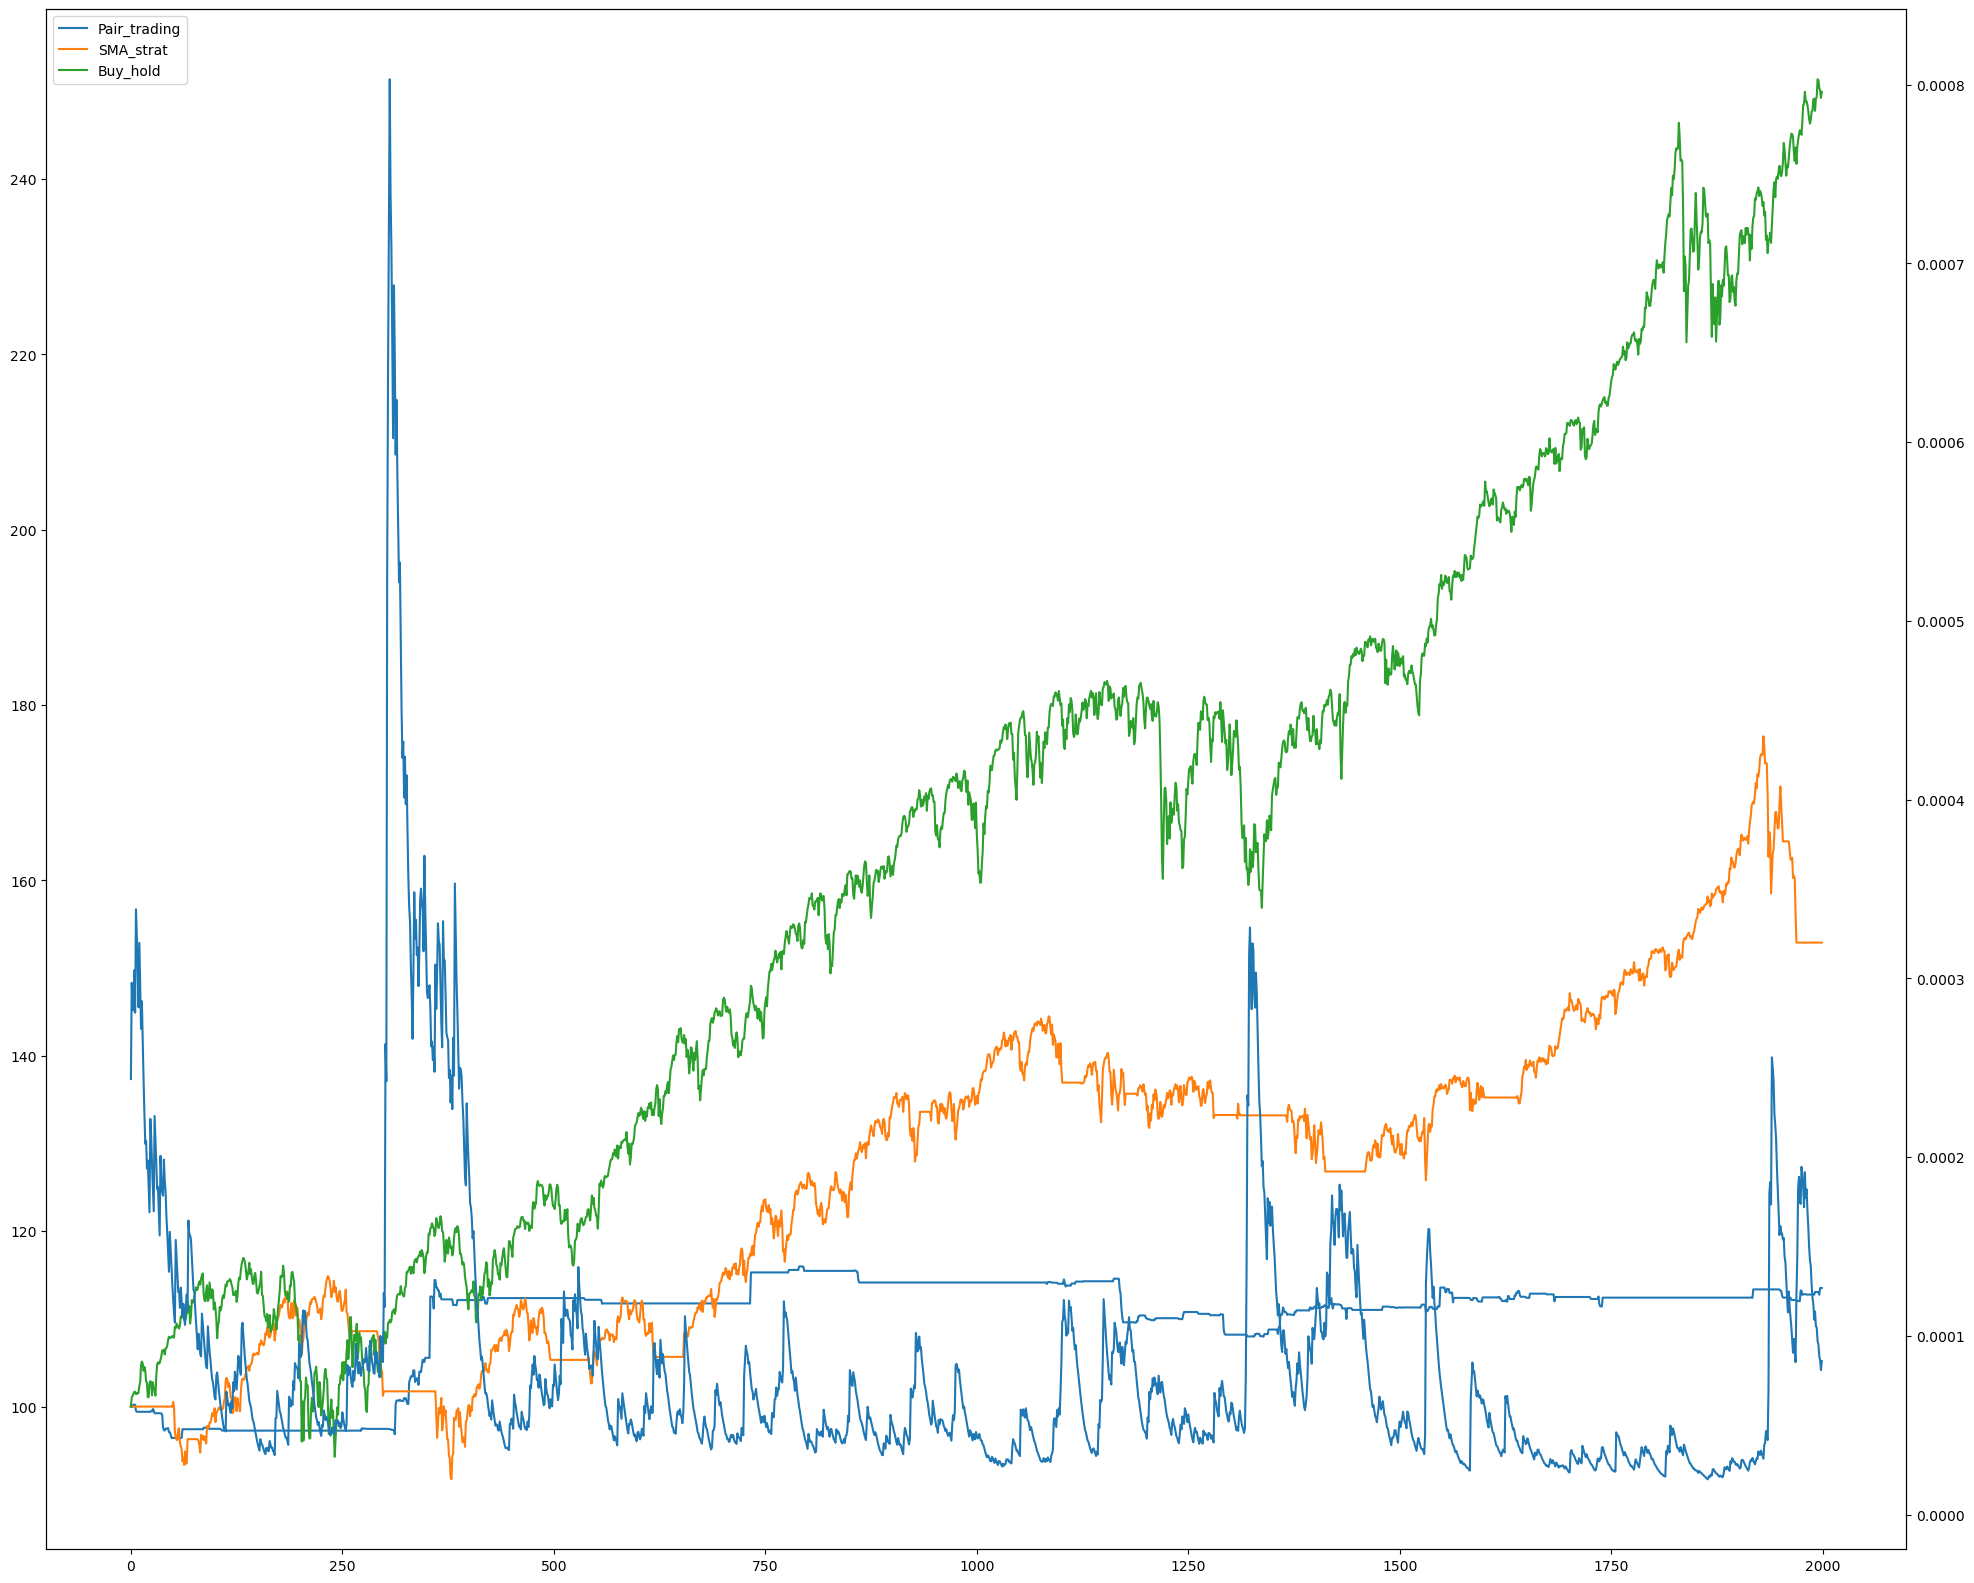

In [285]:
fig, axs = plt.subplots(figsize=(24, 20))

for w in ws:
    if (w[0] == 50):
        if (w[1] == 2):
            w_pair = w[2][:2000]
            
axs.plot(w_pair, label='Pair_trading')
axs.plot(w_SMA[100:2100], label='SMA_strat')
axs.plot(100*w_hold[100:2100]/w_hold[100], label='Buy_hold')
hlpax = axs.twinx()
hlpax.plot(s2[100:2100], label='volatility')           

axs.legend()
plt.show()

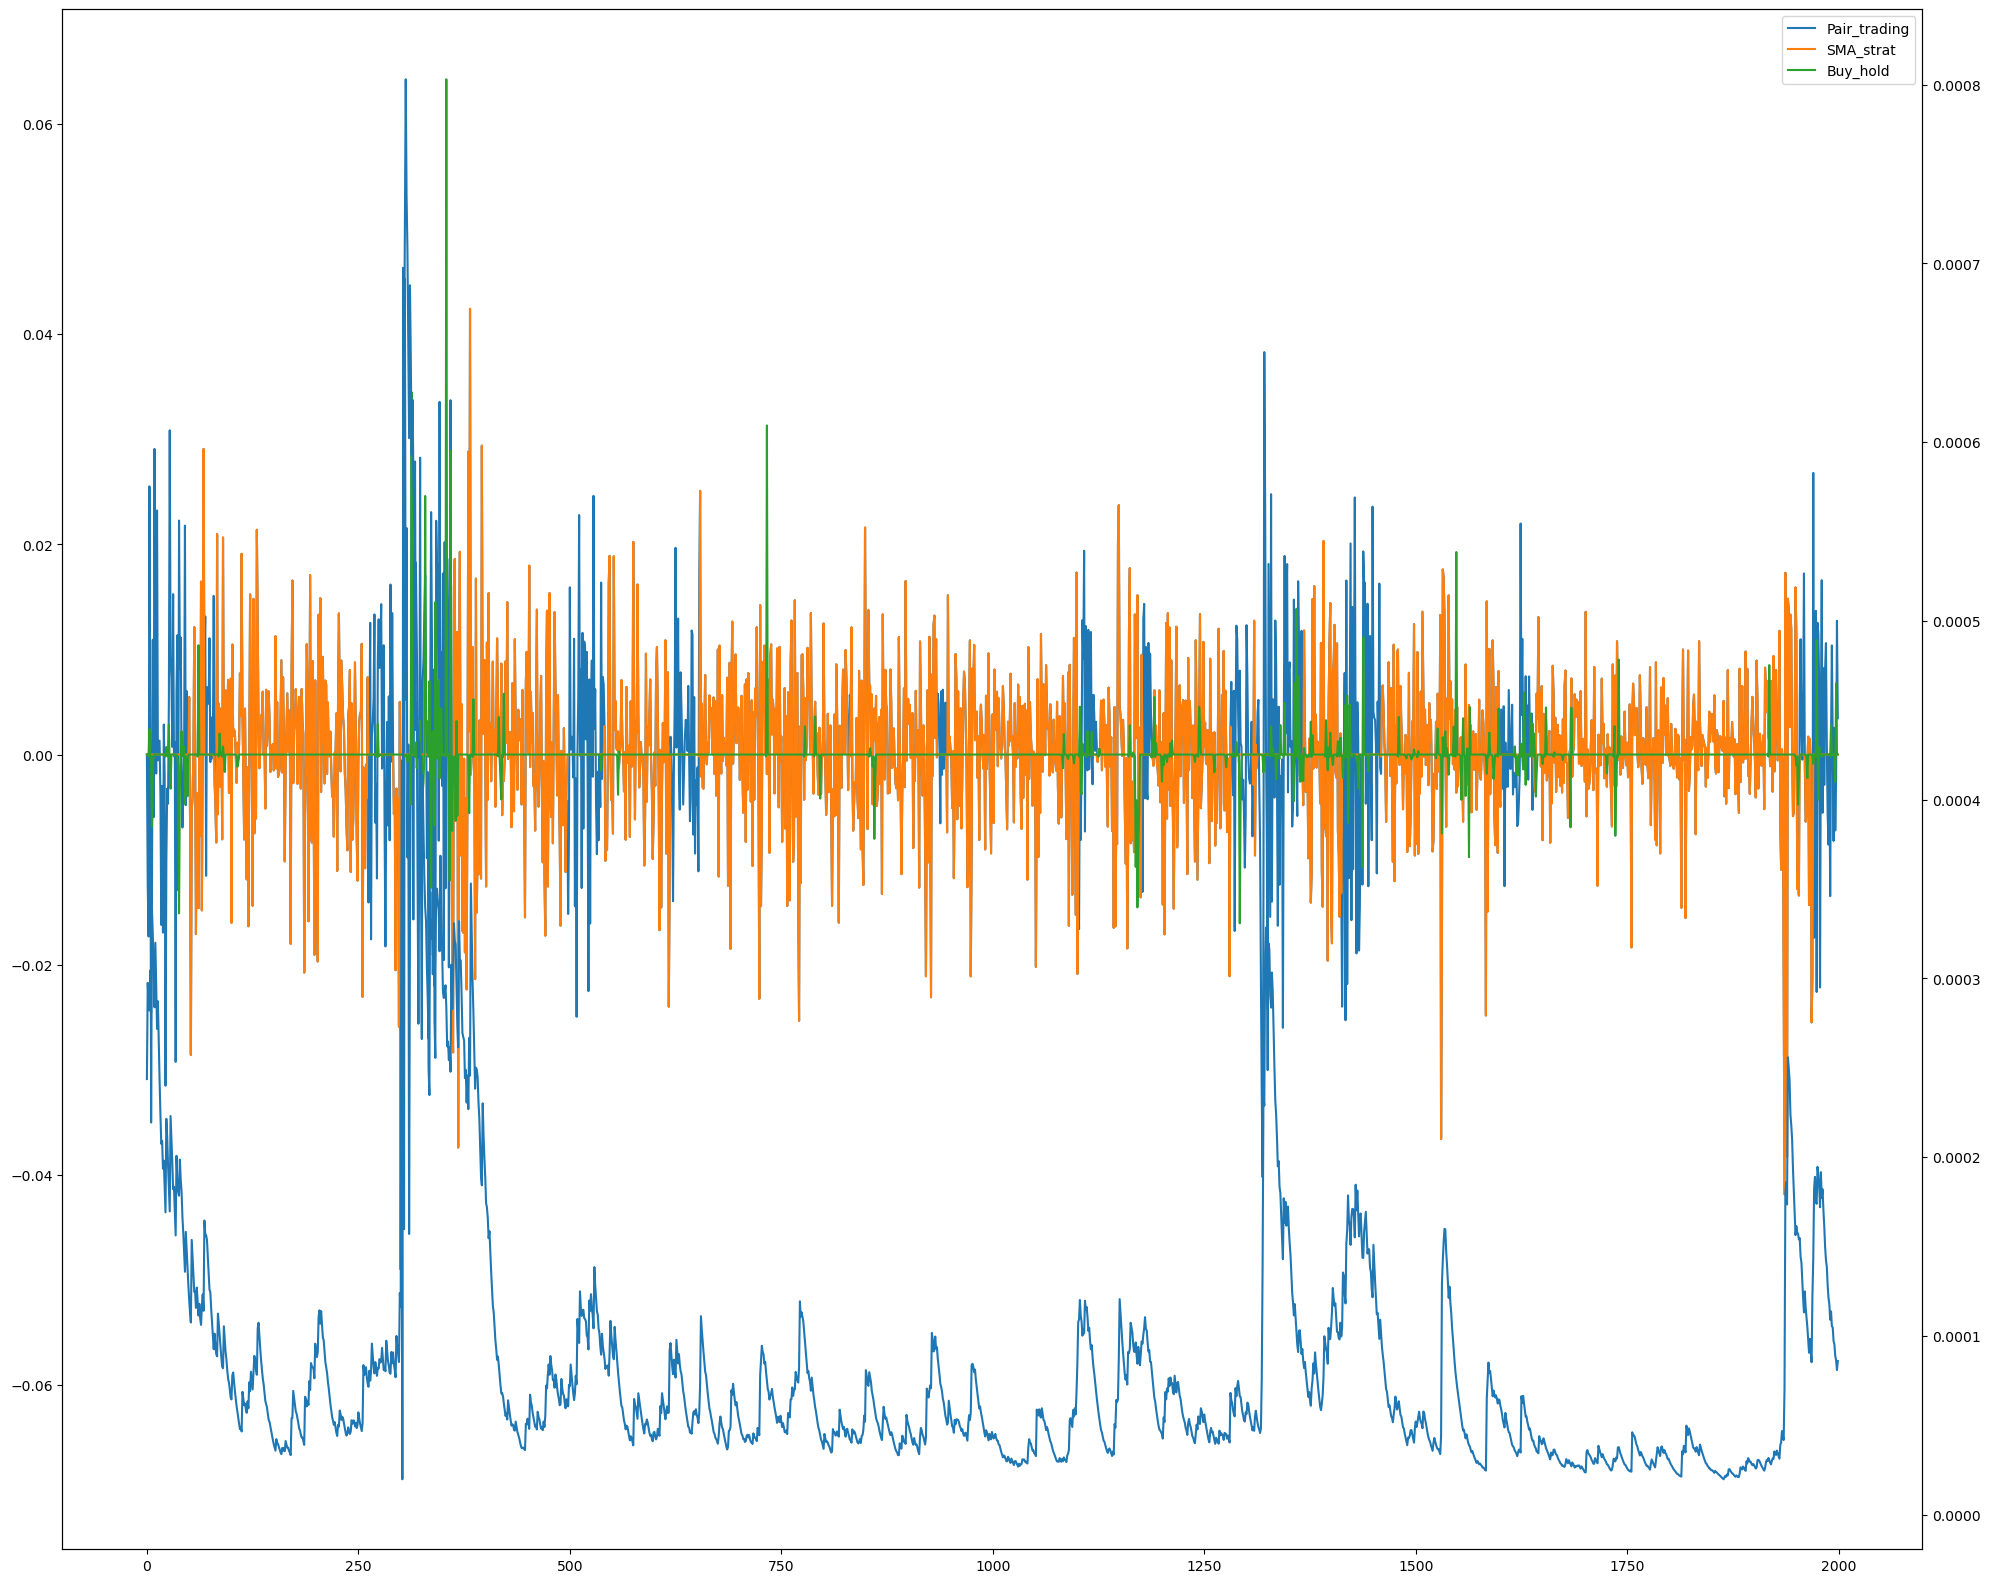

In [286]:
dct = {'Buy_hold':w_hold[:2000],
      'SMA_strat':w_SMA[100:2100],
      'Pair_trades':w_pair,
      'Volatility':s2[100:2100]}
comp = pd.DataFrame(data=dct)
comp['BH_lret'] = np.log(comp.Buy_hold).diff().fillna(0)
comp['SMA_lret'] = np.log(comp.SMA_strat).diff().fillna(0)
comp['PT_lret'] = np.log(comp.Pair_trades).diff().fillna(0)

fig, axs = plt.subplots(figsize=(24, 20))
axs.plot(comp.BH_lret, label='Pair_trading')
axs.plot(comp.SMA_lret, label='SMA_strat')
axs.plot(comp.PT_lret, label='Buy_hold')
hlpax = axs.twinx()
hlpax.plot(comp.Volatility, label='volatility')           

axs.legend()
plt.show()

In [287]:
def mix_tr(brd):
    mix_lret = (comp.Volatility >= brd)*comp.PT_lret + (comp.Volatility < brd)*comp.SMA_lret
    return 100*np.exp(mix_lret.sum())

0.00023009367243873697 185.30672422327163


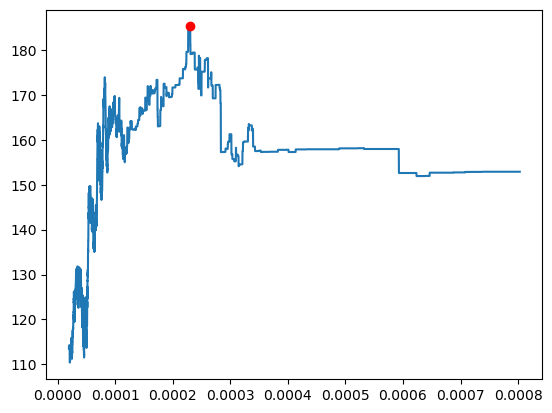

In [288]:
brds = np.exp(np.linspace(np.log(comp.Volatility.min()), np.log(comp.Volatility.max()), 10000))
rets = [mix_tr(brd) for brd in brds]
print(brds[np.argmax(rets)], rets[np.argmax(rets)])

plt.plot(brds, rets)
plt.plot([brds[np.argmax(rets)]], [rets[np.argmax(rets)]], color='red', marker='o')
plt.show()

Result on train

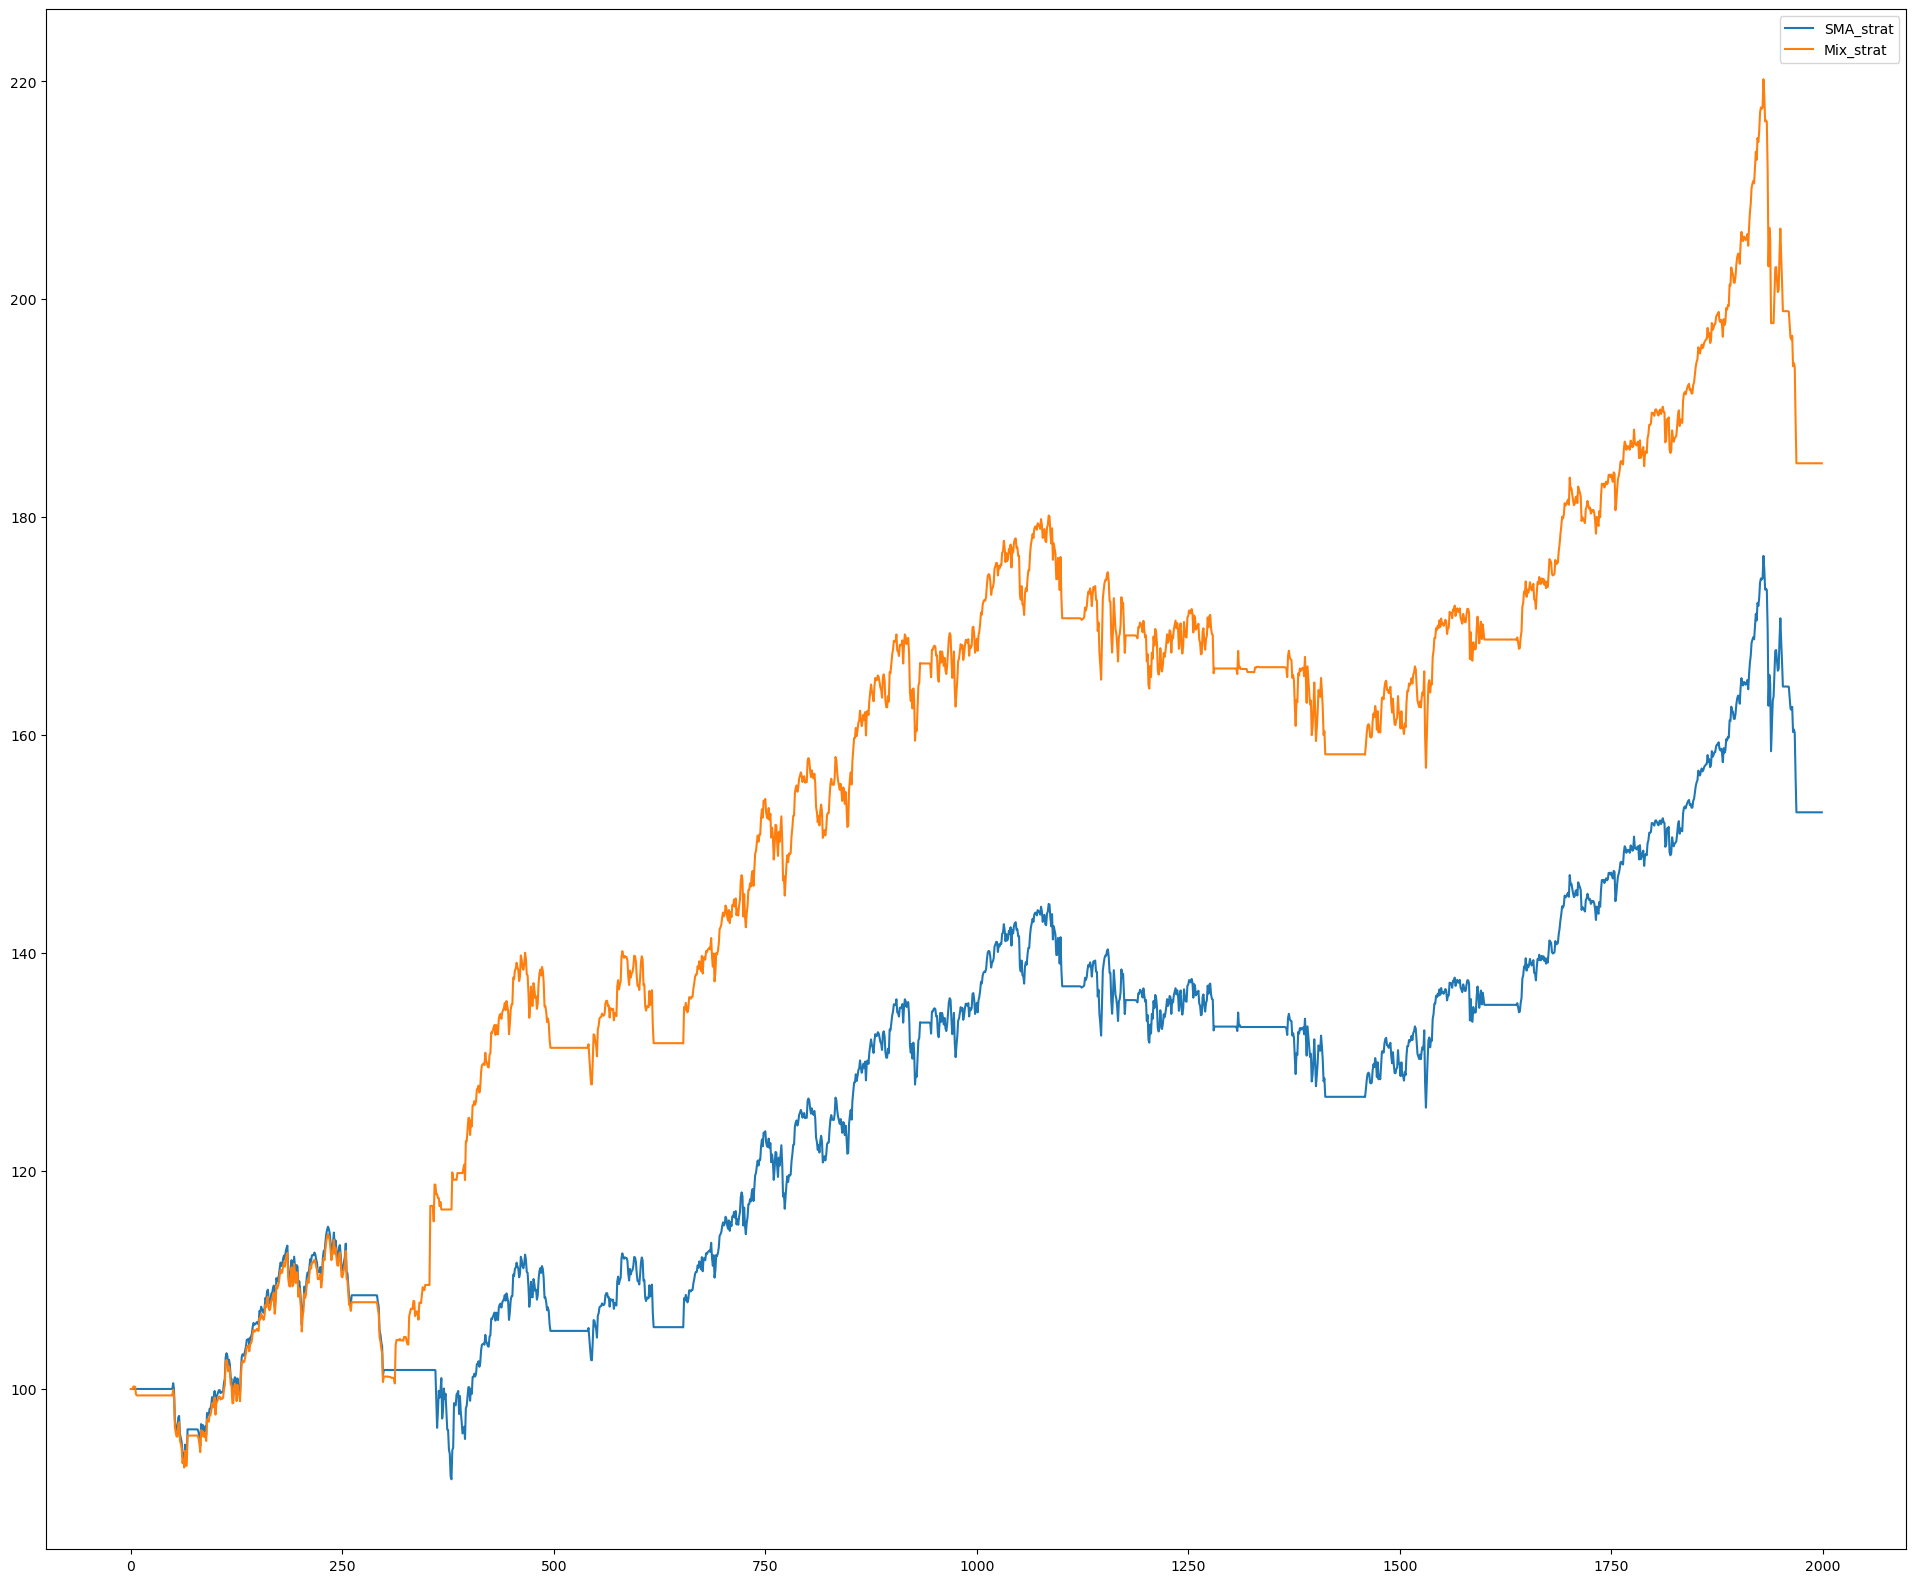

In [289]:
# mix strategy: if volatility < 8.2e-05 use SMA_strategy (69% of days), else use pair trading (31% of days)
brd = 0.00023
mix_lret = (comp.Volatility >= brd)*comp.PT_lret + (comp.Volatility < brd)*comp.SMA_lret
w_mix = 100*np.exp(np.cumsum(mix_lret))

fig, axs = plt.subplots(figsize=(24, 20))
axs.plot(w_SMA[100:2100], label='SMA_strat')
axs.plot(w_mix, label='Mix_strat')
axs.legend()
plt.show()

Result on test

In [290]:
def L_GJR_test(params):
    prc = np.log(SP500.Price).diff().values
    mn, om, a, b, c = params
    v = 0
    s2 = [om/(1-a-b)]
    prc[0] = om/(1-a-b)
    for i in range(1, len(SP500)):
        if (prc[i-1] - mn > 0):
            ind = 1
        else:
            ind = 0
        s2.append(om + a*((prc[i-1]-mn)**2) + b*(s2[len(s2)-1]) + c*ind*((prc[i-1]-mn)**2))
        v = v + 0.5* np.log(s2[len(s2)-1]) + ((prc[i]-mn)**2)/(2*s2[len(s2)-1])
    return v/len(SP500)

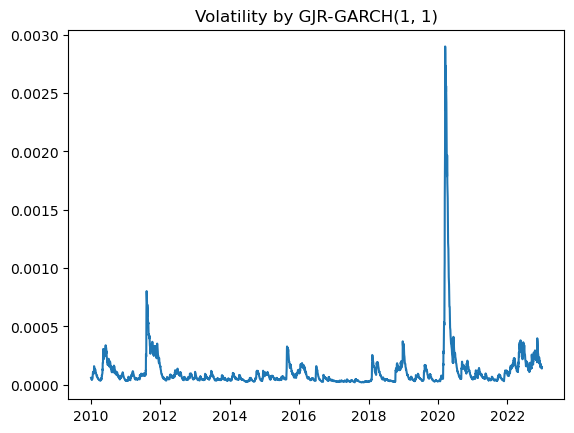

In [291]:
result = minimize(fun=L_GJR, x0=np.array([0.0003, 0.0001, 0.05, 0.9, 0.01]),
                  bounds=((-0.5, 0.5), (0, 1), (0.000001, 1), (0.000001, 1), (0.000001, 1)))
res = result.x
prc = np.log(SP500.Price).diff().values
mn, om, a, b, c = res
s2 = [om/(1-a-b)]
prc[0] = om/(1-a-b)
for i in range(1, len(SP500)):
    if (prc[i-1] - mn > 0):
        ind = 1
    else:
        ind = 0
    s2.append(om + a*((prc[i-1]-mn)**2) + b*(s2[len(s2)-1]) + c*ind*((prc[i-1]-mn)**2))
    
plt.plot(SP500.Price.index, s2)
plt.title('Volatility by GJR-GARCH(1, 1)')
plt.show()

In [292]:
for w in ws:
    if (w[0] == 50):
        if (w[1] == 2):
            w_pair_test = 100*w[2][2000:]/w[2][2000]
            
w_SMA_test = 100*w_SMA[2100:]/w_SMA[2100]

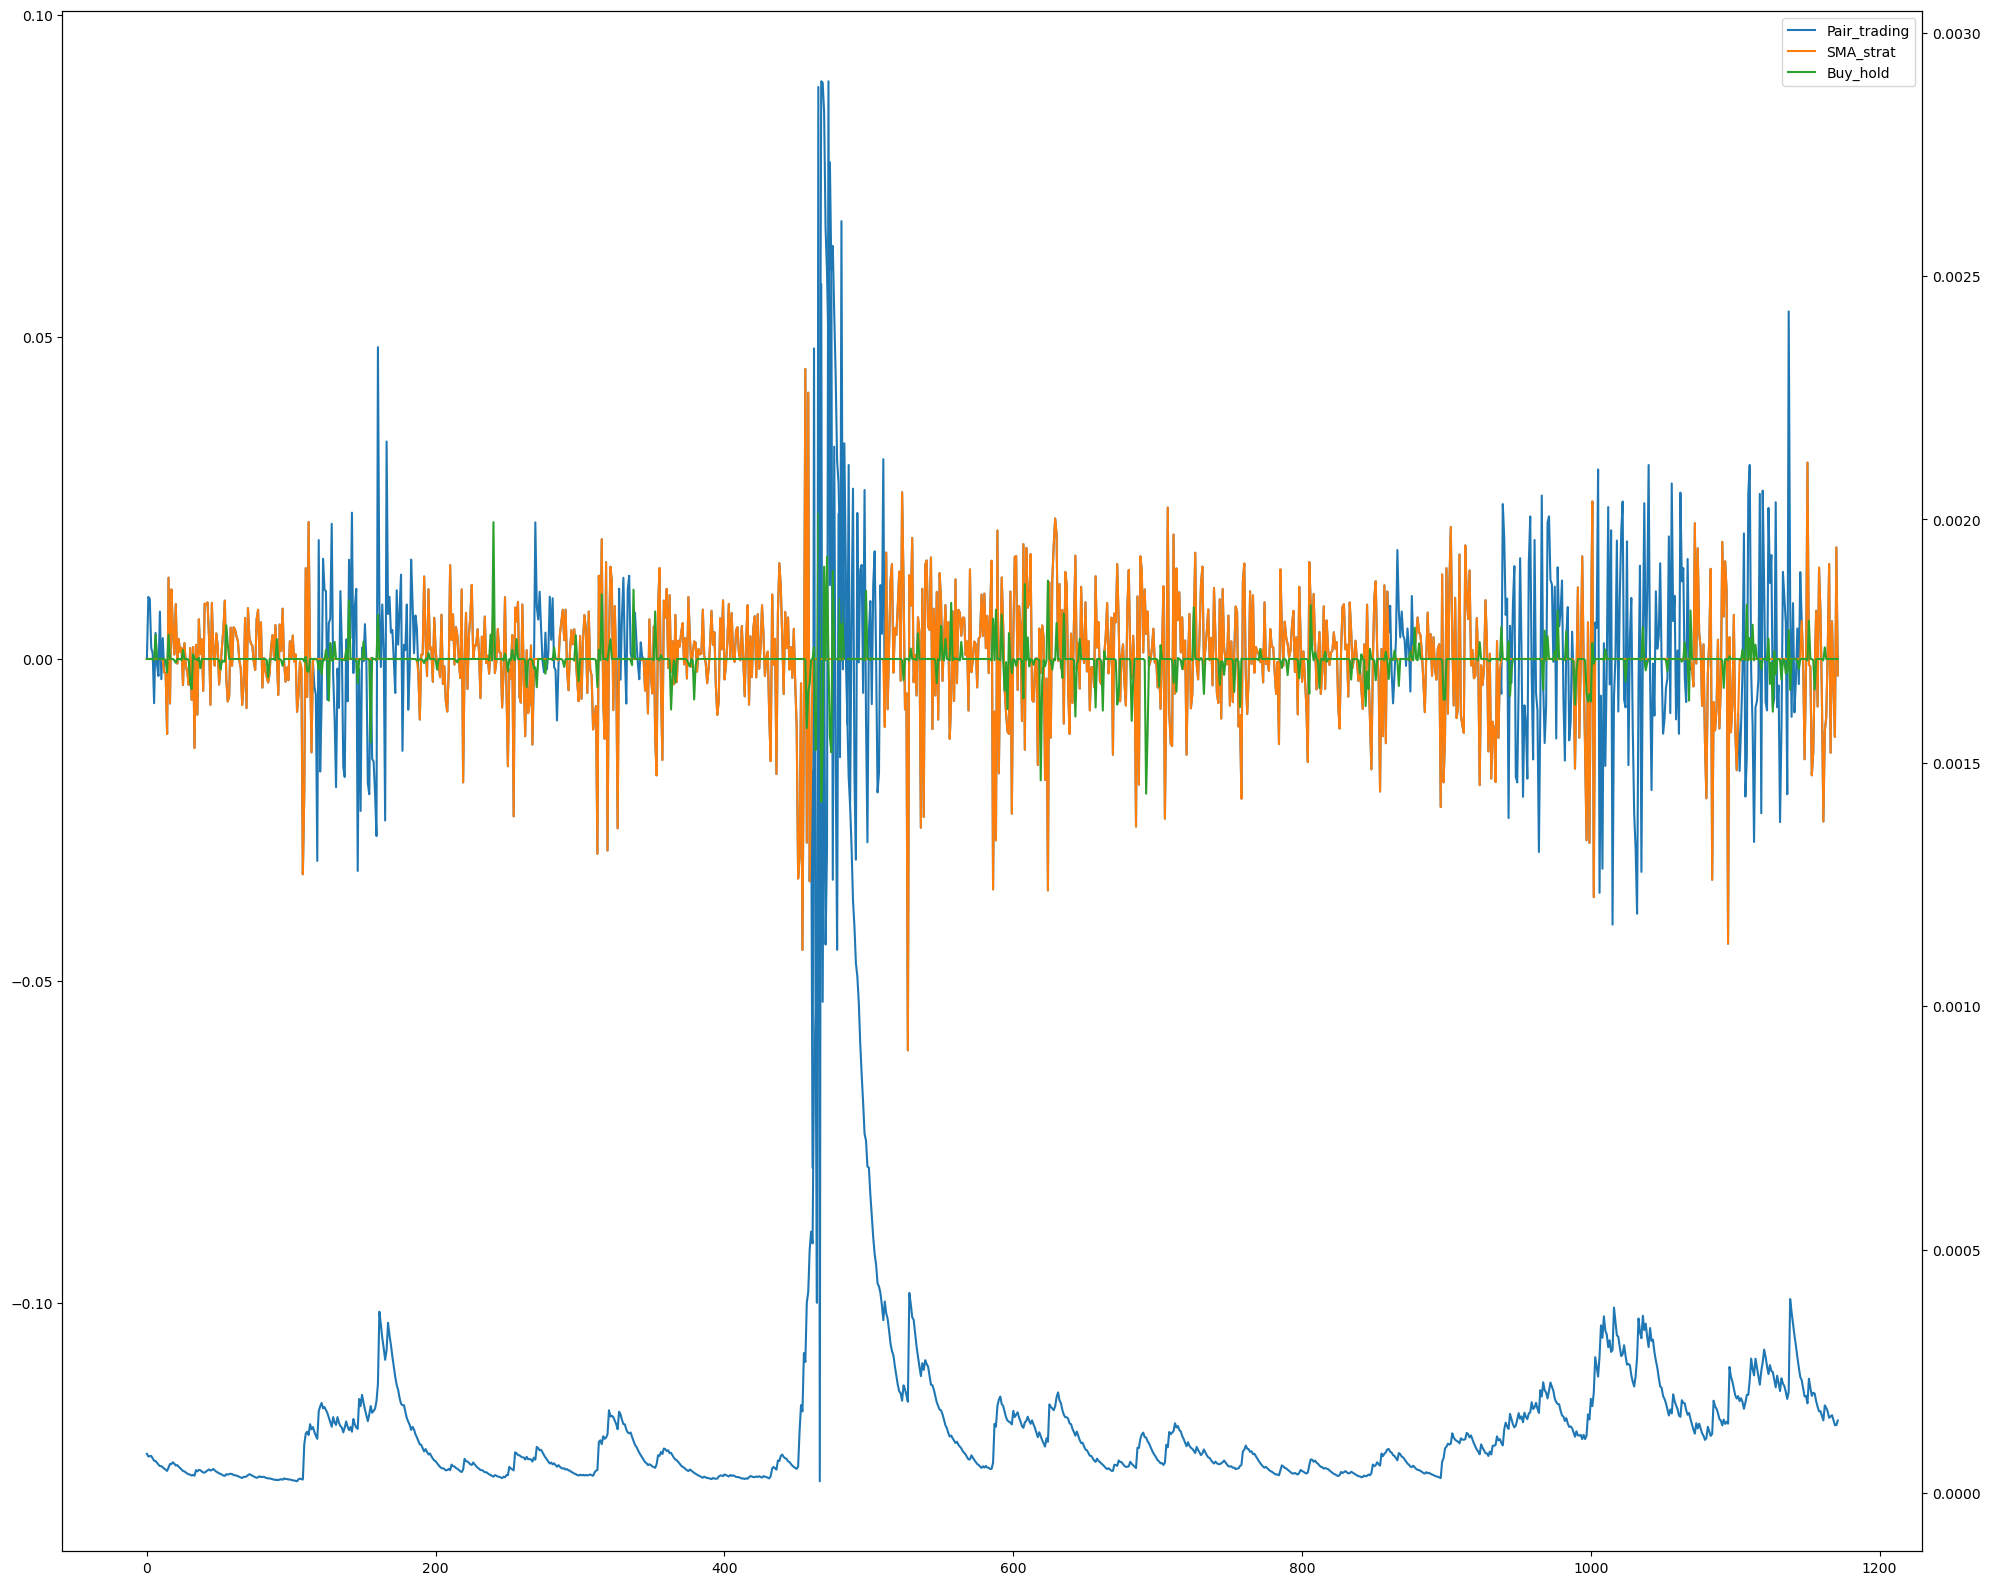

In [293]:
dct = {'Buy_hold':100*w_hold[2000:]/w_hold[2000],
      'SMA_strat':w_SMA_test,
      'Pair_trades':w_pair_test,
      'Volatility':s2[2100:]}
comp_test = pd.DataFrame(data=dct)
comp_test['BH_lret'] = np.log(comp_test.Buy_hold).diff().fillna(0)
comp_test['SMA_lret'] = np.log(comp_test.SMA_strat).diff().fillna(0)
comp_test['PT_lret'] = np.log(comp_test.Pair_trades).diff().fillna(0)

fig, axs = plt.subplots(figsize=(24, 20))
axs.plot(comp_test.BH_lret, label='Pair_trading')
axs.plot(comp_test.SMA_lret, label='SMA_strat')
axs.plot(comp_test.PT_lret, label='Buy_hold')
hlpax = axs.twinx()
hlpax.plot(comp_test.Volatility, label='volatility')           

axs.legend()
plt.show()

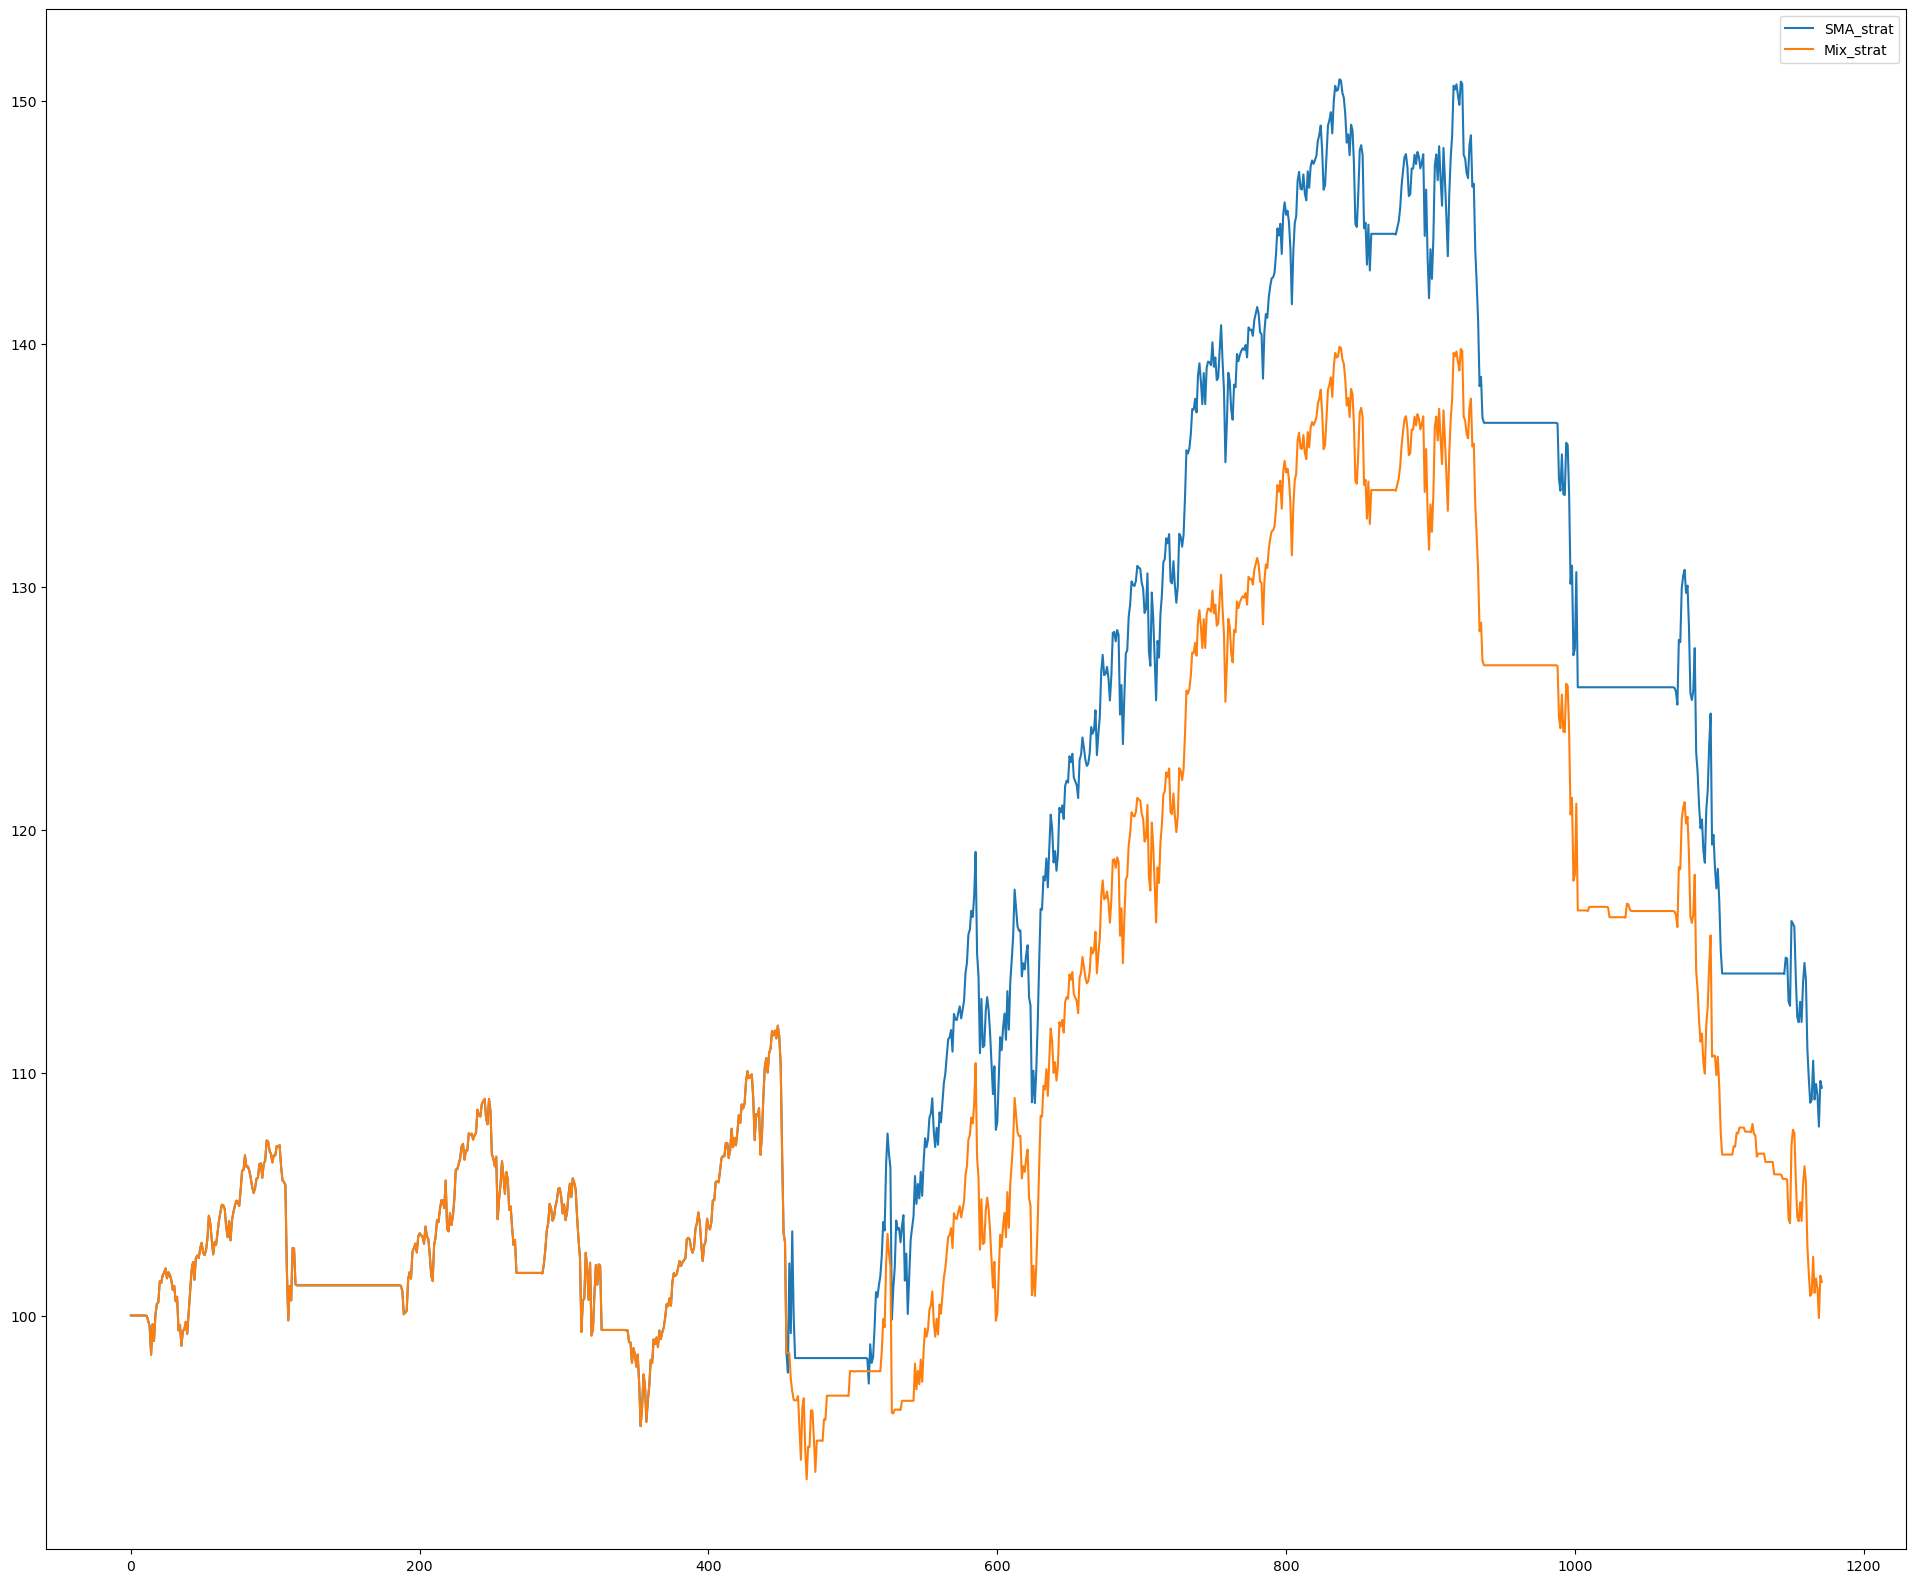

In [294]:
# mix strategy: if volatility < 8.2e-05 use SMA_strategy (69% of days), else use pair trading (31% of days)
brd = 0.00023
mix_lret = (comp_test.Volatility >= brd)*comp_test.PT_lret + (comp_test.Volatility < brd)*comp_test.SMA_lret
w_mix = 100*np.exp(np.cumsum(mix_lret))

fig, axs = plt.subplots(figsize=(24, 20))
axs.plot(w_SMA_test, label='SMA_strat')
axs.plot(w_mix, label='Mix_strat')
axs.legend()
plt.show()

C:\Users\valen\anaconda3\Lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\valen\anaconda3\Lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\valen\anaconda3\Lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\valen\anaconda3\Lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warning

C:\Users\valen\anaconda3\Lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


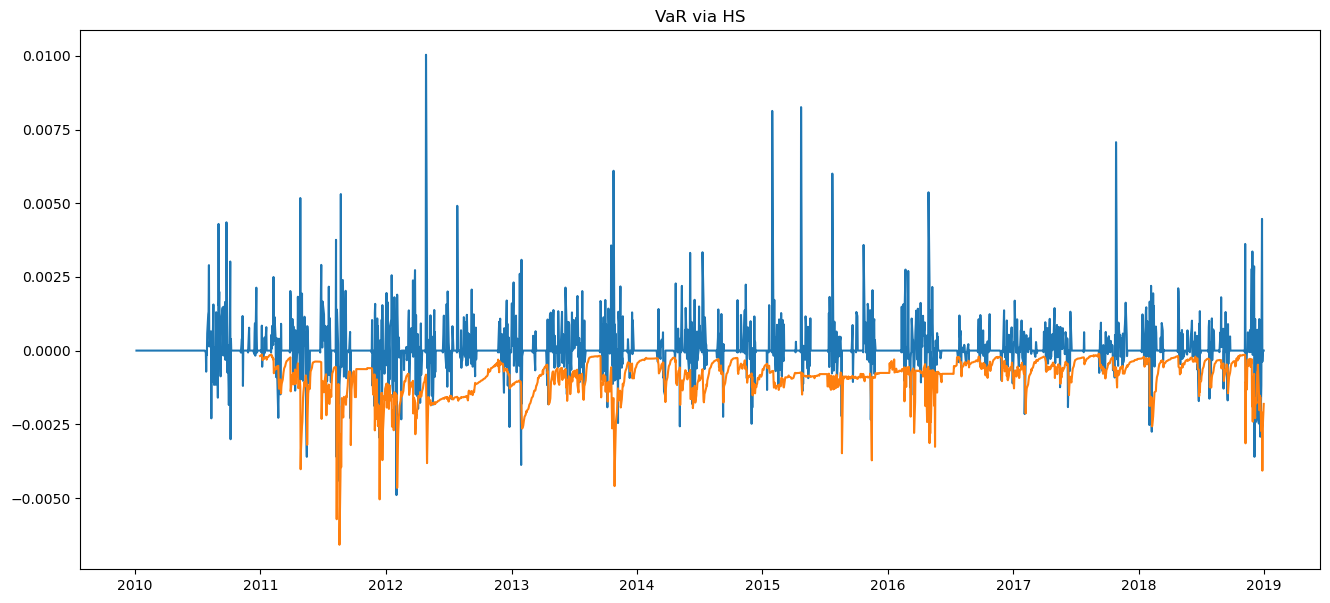

In [61]:
def calc_VaR(r, VaR_fun, L_history, level=0.05):
    VaR = np.full(r.size, np.nan)
    
    for i in range(L_history, len(r)):
        history = r[i - L_history: i]
        VaR[i] = VaR_fun(history, level)
        
    return pd.Series(data=VaR, index=r.index, name=VaR_fun.__name__)

def calculate_VaR_FHS(returns, alpha):


    mdl = arch_model(100 * returns,
                    mean='HARX', lags=1, 
                    vol='Garch', p=1, o=1, q=1, 
                    dist='normal')

    res = mdl.fit(disp='off')

    stand_residuals = res.resid / res.conditional_volatility
    stand_residuals = stand_residuals.dropna()

    forecasts = res.forecast(horizon=1)
    cond_mean = float(forecasts.mean.iloc[-1])
    cond_var = float(forecasts.variance.iloc[-1])

    conditional_sr = cond_mean + np.sqrt(cond_var) * stand_residuals
    conditional_sr = conditional_sr / 100

    VaR_FHS = conditional_sr.quantile(alpha)

    return VaR_FHS

VaR_HS = calc_VaR(df1['Strategy Returns'].dropna(), calculate_VaR_FHS, L_history=250, level=0.05)

plt.figure(figsize=(16,7))
plt.plot(df1['Strategy Returns'])
plt.plot(VaR_HS)
plt.title('VaR via HS')
plt.show()

In [62]:
def sharpe_ratio(returns, periods):
    return np.sqrt(periods)*np.mean(returns)/np.std(returns)
print('Sharpe ratio = {:.5f}'.format(sharpe_ratio(df1['Strategy Returns'], 1)))

def beta(ret, market_ret):
    return ((np.cov(ret, market_ret))/((np.cov(market_ret, market_ret))))[0,1]
print('Beta = {:.5f}'.format(beta(np.asarray(df1['Strategy Returns'].dropna()), np.asarray(market1_ret.dropna()))))


def drawdown(pnl, period):
    i=period
    drawdown=[]
    while i<= len(pnl):
        a=pnl[i-period:i].max()
        b=pnl[i-period:i].min()
        drawdown.append(a-b)
        i=i+period
    #print(drawdown)
    drawdown=np.asarray(drawdown)
    return drawdown.max()

def rachev_ratio(ret, alpha, beta):
    a=ret.quantile(alpha)
    b=-ret.quantile(1-beta)
    return b/a

def VAR_Pareto(ret, alpha):
    u = ret.quantile(0.2)
    ret_tail = ret[ret <= u]
    params_genpareto = ss.genpareto.fit(-ret_tail, loc=0)
    c, loc, scale = params_genpareto
    VaR_genpareto = u - scale / c * ((alpha/(ret <= u).mean())**(-c) - 1)
    ES_genpareto = VaR_genpareto / (1 - c) - (scale - c*u) / (1 - c)
    return (VaR_genpareto, ES_genpareto)

  

print('Max drawdown for week = {:.5f}%'.format(drawdown(df1['Strategy Returns'], 7)*100))
VaR, ES = VAR_Pareto(df1['Strategy Returns'], 0.05) #считаем 5%-ые VaR и ES
print('VaR = {:.5f}%'.format(VaR*100))
#print(df1['Strategy Returns'].quantile(0.05)*100)
print('ES = {:.5f}%'.format(ES*100))
print('Rachev ratio = {:.5f}'.format(rachev_ratio(df1['Strategy Returns'], 0.05, 0.05)))

Sharpe ratio = 0.12109
Beta = 0.02925
Max drawdown for week = 1.06350%
VaR = -0.09877%
ES = -0.27114%
Rachev ratio = 1.32942
